# Coding challenge

This notebook provides a ML model to predict the "hotness" of an airbnb property in Oxford and Manchester.

In [1]:
# load packages, see requirements.txt

import sys 
print("Python version: {}". format(sys.version))

import pandas as pd 
print("pandas version: {}". format(pd.__version__))

import matplotlib 
print("matplotlib version: {}". format(matplotlib.__version__))

import seaborn
print("seaborn version: {}". format(seaborn.__version__))

import numpy as np 
print("NumPy version: {}". format(np.__version__))

import scipy as sp 
print("SciPy version: {}". format(sp.__version__))  

import missingno as msno
print("Missingno version: {}". format(msno.__version__)) 

import IPython
from IPython import display # for pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn 
print("scikit-learn version: {}". format(sklearn.__version__))

Python version: 3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
pandas version: 0.24.2
matplotlib version: 3.1.2
seaborn version: 0.9.0
NumPy version: 1.16.4
SciPy version: 1.3.0
Missingno version: 0.4.2
IPython version: 7.6.1
scikit-learn version: 0.22


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Ignore Warning in IPython
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Initialising the random seed 
random.seed(42)

# Load the dataset and perform basic inference

In [4]:
current_path = os.getcwd()

data_path = os.path.dirname(current_path)
data_path_ox = os.path.join(data_path, 'data/Airbnb_Oxford.csv')
data_path_man = os.path.join(data_path, 'data/Airbnb_Manchester.csv')

In [5]:
# Load data (and parse Reporting Month into datetime objects)
oxford_df = pd.read_csv(data_path_ox, parse_dates=['Reporting Month'])
manchester_df = pd.read_csv(data_path_man, parse_dates=['Reporting Month'])

Perform basic inference on the datasets, e.g. how many entries, what are the fields, etc

In [6]:
oxford_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66831 entries, 0 to 66830
Data columns (total 26 columns):
Property ID                      66831 non-null float64
Property Type                    66796 non-null object
Listing Type                     66796 non-null object
Bedrooms                         66769 non-null float64
Reporting Month                  66831 non-null datetime64[ns]
Occupancy Rate                   61135 non-null float64
Revenue (USD)                    55522 non-null float64
Revenue (Native)                 66714 non-null float64
ADR (USD)                        30578 non-null float64
ADR (Native)                     30578 non-null float64
Number of Reservations           66831 non-null int64
Reservation Days                 66831 non-null int64
Available Days                   66831 non-null int64
Blocked Days                     66831 non-null int64
Country                          66831 non-null object
State                            66831 non-null object


In [7]:
manchester_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174517 entries, 0 to 174516
Data columns (total 26 columns):
Property ID                      174517 non-null float64
Property Type                    174375 non-null object
Listing Type                     174392 non-null object
Bedrooms                         174315 non-null float64
Reporting Month                  174517 non-null datetime64[ns]
Occupancy Rate                   163636 non-null float64
Revenue (USD)                    142137 non-null float64
Revenue (Native)                 173934 non-null float64
ADR (USD)                        80390 non-null float64
ADR (Native)                     80386 non-null float64
Number of Reservations           174517 non-null int64
Reservation Days                 174517 non-null int64
Available Days                   174517 non-null int64
Blocked Days                     174517 non-null int64
Country                          174517 non-null object
State                            174517 

In [8]:
# check and ensure there are no overlapping Property ID between the two datasets
np.intersect1d(oxford_df['Property ID'], manchester_df['Property ID'])

array([], dtype=float64)

In [9]:
# concatenate the two dataframes into one single dataframe
airbnb_df = pd.concat([oxford_df, manchester_df])
airbnb_df.reset_index(drop=True, inplace=True)
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241348 entries, 0 to 241347
Data columns (total 26 columns):
Property ID                      241348 non-null float64
Property Type                    241171 non-null object
Listing Type                     241188 non-null object
Bedrooms                         241084 non-null float64
Reporting Month                  241348 non-null datetime64[ns]
Occupancy Rate                   224771 non-null float64
Revenue (USD)                    197659 non-null float64
Revenue (Native)                 240648 non-null float64
ADR (USD)                        110968 non-null float64
ADR (Native)                     110964 non-null float64
Number of Reservations           241348 non-null int64
Reservation Days                 241348 non-null int64
Available Days                   241348 non-null int64
Blocked Days                     241348 non-null int64
Country                          241348 non-null object
State                            24134

In [10]:
# Inspecting the head of the dataset
airbnb_df.head()

,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,City,Zipcode,Neighborhood,Metropolitan Statistical Area,Latitude,Longitude,Active,Scraped During Month,Currency Native,Host ID
0,87535.0,House,Private room,1.0,2016-05-01,NaN,NaN,0.0,NaN,NaN,...,Oxford,NaN,NaN,NaN,51.776051,-1.235621,False,True,GBP,6659668.0
1,87535.0,House,Private room,1.0,2016-06-01,NaN,NaN,0.0,NaN,NaN,...,Oxford,NaN,NaN,NaN,51.776051,-1.235621,False,True,GBP,6659668.0
2,87535.0,House,Private room,1.0,2016-07-01,NaN,NaN,0.0,NaN,NaN,...,Oxford,NaN,NaN,NaN,51.776051,-1.235621,False,False,GBP,6659668.0
3,87535.0,House,Private room,1.0,2016-08-01,0.0,NaN,0.0,NaN,NaN,...,Oxford,NaN,NaN,NaN,51.776051,-1.235621,False,False,GBP,6659668.0
4,87535.0,House,Private room,1.0,2016-09-01,0.0,NaN,0.0,NaN,NaN,...,Oxford,NaN,NaN,NaN,51.776051,-1.235621,False,False,GBP,6659668.0


The combined dataset corresponding to airbnb property listings in both Oxford and Manchester.  

There are 241,348 entries, with missing entries in the `[Property Type, Listing Type, Bedrooms, Occupancy Rate, Revenue (USD), Revenue (Native), ADR (USD), ADR (Native), Neighborhood, Currency Native, Host ID]` columns and all empty entries in `[Zipcode, Metropolitan Statistical Area]`. In this exercise, we are to build a model to predict whether an airbnb property is considered "hot" or not. We shall discuss how we quantify the "hotness" and the corresponding metrics/relevant targets later.

$\color{blue}{\text{Checking if there exists duplicate entries}}$

In [11]:
# Inspecting if there exists any duplicate entries
airbnb_df[airbnb_df.duplicated(keep=False)]

,Property ID,Property Type,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),...,City,Zipcode,Neighborhood,Metropolitan Statistical Area,Latitude,Longitude,Active,Scraped During Month,Currency Native,Host ID


We can see there are no duplicate entries which might lead to "doubling-counting" in the dataset.

# Feature selection: Remove unwanted/useless (i.e. info duplicating) features

In this section, we perform basic feature selection on the airbnb dataset. In particular, we keep only the relevant features and removing those containing duplicating information. For example, `[Country, State, City, Latitude, Longitude]` all contain location information. We shall keep only the `[City, Latitude, Longitude]` in the following.

In [12]:
# check the number of unique labels/entries in each columns
airbnb_df.nunique()

Property ID                      13825
Property Type                       77
Listing Type                         3
Bedrooms                            11
Reporting Month                     53
Occupancy Rate                     309
Revenue (USD)                    28750
Revenue (Native)                 58563
ADR (USD)                        23513
ADR (Native)                     21126
Number of Reservations              30
Reservation Days                    32
Available Days                      32
Blocked Days                        32
Country                              1
State                                2
City                                 2
Zipcode                              0
Neighborhood                        10
Metropolitan Statistical Area        0
Latitude                         12931
Longitude                        13168
Active                               2
Scraped During Month                 2
Currency Native                     10
Host ID                  

We can see that the feature variables `[Country, State]` have little variances and useful information, with only have 1 or 2 unique values; whereas `[Zipcode, Metropolitan Statistical Area]` are all empty. On the other hand, `Neighborhood` gives the region where the property is in within Manchester, which duplicates information in `[Latitude, Longitude]`. We will remove all these columns since they are deemed as not predictive/duplicating. 

$\color{blue}{\text{1) Removing duplicating location-related features and features with no variance}}$

In [13]:
# Inspect unique labels in the Neighborhood column
airbnb_df['Neighborhood'].unique()

array([nan, 'Rochdale       ', 'Manchester East', 'Bolton         ',
       'Tameside       ', 'Trafford       ', 'Salford        ',
       'Bury           ', 'Stockport      ', 'Wigan          ',
       'Oldham         '], dtype=object)

In [14]:
# columns to remove
col_remove = ['Country', 'State', 'Zipcode', 'Neighborhood', 'Metropolitan Statistical Area']

airbnb_df.drop(col_remove, axis=1, inplace=True)

$\color{blue}{\text{2) Removing duplicating money-related features}}$

In the dataset, we can see `Revenue, ADR` are reported in multiple columns, one in USD dollars and the other in native currency. For easy comparison, we shall keep only the `Revenue/ADR (USD)` columns. However, since there are more missing entries in `Revenue (USD)` than that in `Revenue (Native)`, we should convert and impute missing entries in `Revenue (USD)` using `Revenue (Native)` whenever possible.

In [15]:
# Inspect the money columns (+ Number of Reservations) of the dataset
money_col = ['Revenue (USD)', 'Revenue (Native)', 'ADR (USD)', 'ADR (Native)', 'Currency Native', 
             'Number of Reservations']

airbnb_money_df = airbnb_df[money_col]

In [16]:
# Subset the dataset where Revenue (Native)=0 and check the summary stats of the money-related features
airbnb_money_df.loc[airbnb_money_df['Revenue (Native)']==0].describe(include='all')

,Revenue (USD),Revenue (Native),ADR (USD),ADR (Native),Currency Native,Number of Reservations
count,86691.000000,129684.0,0.0,0.0,127720,129684.0
unique,NaN,NaN,NaN,NaN,10,NaN
top,NaN,NaN,NaN,NaN,GBP,NaN
freq,NaN,NaN,NaN,NaN,125204,NaN
mean,0.088407,0.0,NaN,NaN,NaN,0.0
std,4.519088,0.0,NaN,NaN,NaN,0.0
min,0.000000,0.0,NaN,NaN,NaN,0.0
25%,0.000000,0.0,NaN,NaN,NaN,0.0
50%,0.000000,0.0,NaN,NaN,NaN,0.0
75%,0.000000,0.0,NaN,NaN,NaN,0.0


From the above results, we can see there exists cases where there are missing/invalid entries in `Revenue (USD)` but `Revenue (Native)` and `Number of Reservations` are both non-missing and equal to 0. We can therefore assume that all these missing cases simply correspond to entries without any reservations and revenue. $\color{blue}{\text{We will simply impute 0 for `Revenue (USD)` in these cases.}}$

In [17]:
# simple imputation: imputing 0 for Revenue (USD) where Revenue (Native)=0
airbnb_df['Revenue (USD)'] = airbnb_df.apply(lambda x: 0 if x['Revenue (Native)']==0 
                                             else x['Revenue (USD)'], axis=1)

In [18]:
# check if there still exists cases where Revenue/ADR (USD) is missing but Revenue/ADR (Native) is not
airbnb_rev_sub_df = airbnb_df[np.logical_not(airbnb_df['Revenue (Native)'].isna())]
airbnb_adr_sub_df = airbnb_df[np.logical_not(airbnb_df['ADR (Native)'].isna())]

airbnb_rev_sub_df[money_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240648 entries, 0 to 241347
Data columns (total 6 columns):
Revenue (USD)             240648 non-null float64
Revenue (Native)          240648 non-null float64
ADR (USD)                 110964 non-null float64
ADR (Native)              110964 non-null float64
Currency Native           236679 non-null object
Number of Reservations    240648 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 12.9+ MB


In [19]:
airbnb_adr_sub_df[money_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110964 entries, 28 to 241347
Data columns (total 6 columns):
Revenue (USD)             110964 non-null float64
Revenue (Native)          110964 non-null float64
ADR (USD)                 110964 non-null float64
ADR (Native)              110964 non-null float64
Currency Native           108959 non-null object
Number of Reservations    110964 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 5.9+ MB


From the above results, we can see there no longer exists cases where there are missing entries in `Revenue (USD)` but `Revenue (Native)` is non-missing. We can now safely drop the duplicating money-related features and keep only the `Revenue/ADR (USD)` columns.

For simplicity reasons, we assume the `Currency Native` label is not predictive and drop it here. In practice, the `Currency Native` label might contain some useful information, i.e. how the 'hotness' of an airbnb property varies among people from different countries.

In [20]:
# money columns to remove 
money_col_drop = ['Revenue (Native)', 'ADR (Native)', 'Currency Native']

airbnb_df.drop(money_col_drop, axis=1, inplace=True)

$\color{blue}{\text{3) Removing duplicating property type-related features}}$

In the dataset, we can see both `[Listing Type, Property Type]` contain info about the types of the airbnb property listings. For time constraints and simplicity reasons, we shall simply drop the `Property Type` column here. In practice, to utilise all the information available, one might instead use regex to extract useful information from the `Property Type` column instead of dropping the entire column. For example, extract and group the entries into `['Bed & Breakfast'/'Hotel'/'Apartment']` (one would need to think about how to unambiguously classify `Property Type` into different groups though).

In [21]:
airbnb_df['Listing Type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', nan],
      dtype=object)

In [22]:
airbnb_df['Property Type'].unique()

array(['House', 'Apartment', 'Townhouse', 'Private room in house',
       'Bed and breakfast', 'Bed &amp; Breakfast', 'Entire apartment',
       'Private room in loft', 'Cabin', 'Bed & Breakfast', 'Tiny house',
       'Guesthouse', 'Serviced apartment', 'Cottage',
       'Private room in apartment', 'Entire house', 'Private room',
       'Boat', 'Camper/RV', 'Loft', 'Guest suite', 'Hostel', 'Chalet',
       'Entire townhouse', 'Villa', 'Bungalow', 'Houseboat',
       'Entire guesthouse', 'Condominium', 'Entire Floor', 'Other',
       'Dorm', nan, 'Shepherd&#39;s hut', 'Cave', 'Private room in boat',
       'Room in hotel', 'Barn', 'Home/apt', 'Private room in dorm',
       'Entire bungalow', 'Room in boutique hotel',
       'Private room in bed and breakfast', 'Place', 'Casa particular',
       'Casa particular (cuba)', 'Private room in hut', 'Parking Space',
       'Treehouse', 'Room in aparthotel',
       'Private room in bed & breakfast', 'Shared room in apartment',
       'Tent', '

In [23]:
# check if there exists cases where Listing Type is NaN but Property Type is not NaN
airbnb_type_sub_df = airbnb_df[np.logical_not(airbnb_df['Property Type'].isna())]
airbnb_type_sub_df[['Listing Type', 'Property Type']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 241171 entries, 0 to 241347
Data columns (total 2 columns):
Listing Type     241171 non-null object
Property Type    241171 non-null object
dtypes: object(2)
memory usage: 5.5+ MB


In [24]:
# remove the Property Type column and recast Listing Type as categorical
airbnb_df.drop('Property Type', axis=1, inplace=True)
airbnb_df['Listing Type'] = airbnb_df['Listing Type'].astype('category')

# Check the pattern of missing data

After some basic inference on the dataset, we will visualise and study if there exists any patterns for the missing entries. In particular, deducing whether the missing entries are `Missing Completely at Random`, `Missing at Random` or `Missing Not at Random`.

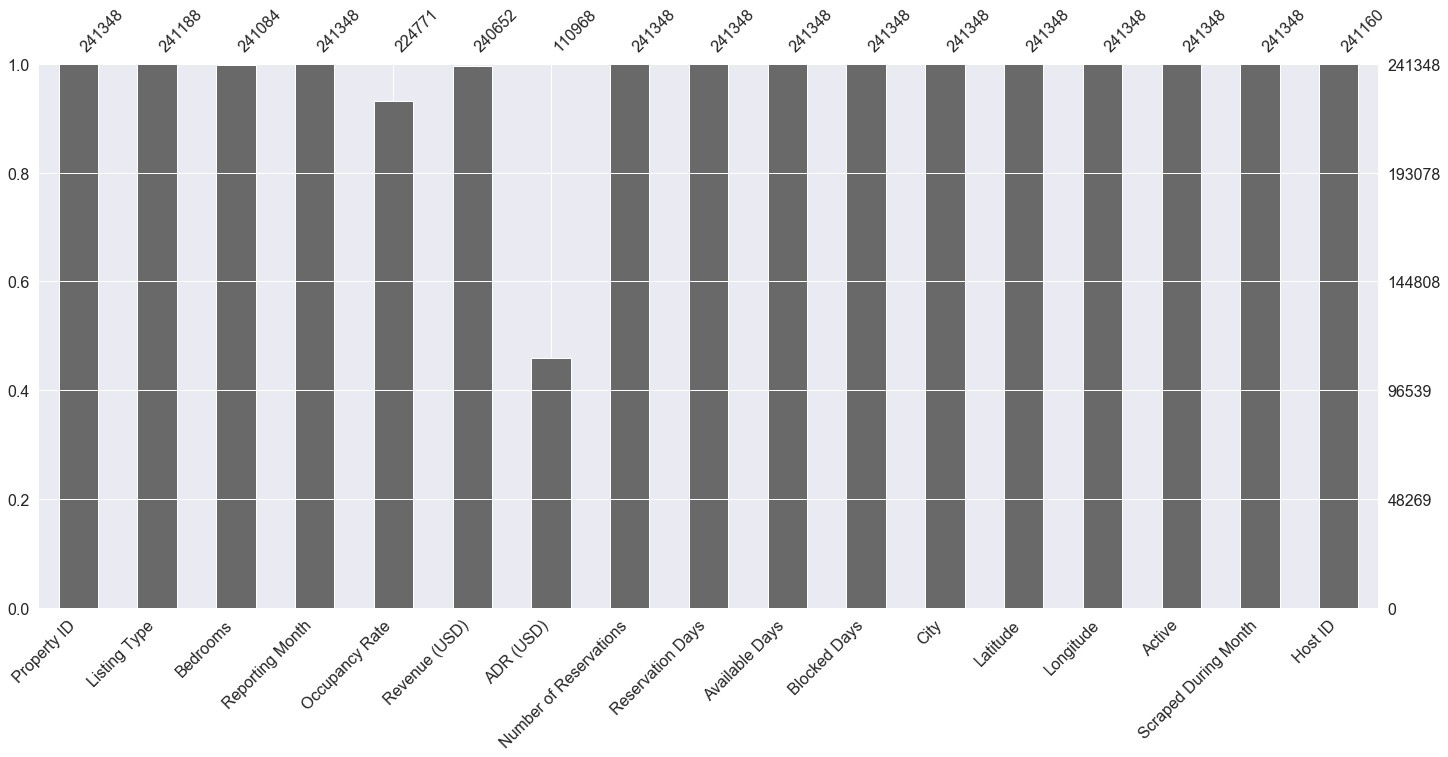

In [25]:
# Figures inline and set visualisation style
%matplotlib inline
sns.set()

msno.bar(airbnb_df)
plt.show()

From the above plot, we can see all columns have `>90%` non-missing entries except the `[ADR (USD)]` column which has over `>50%` missing entries. Now, let's sheck if the missing data has any underlying patterns. This would be helpful for choosing the appropriate imputation strategy. By plotting the missingness matrix, we can look at where the missing entries occur. We can then plot the correlation heatmap about the locations of missing values to check if there exists any underlying relations between features whenever missing entries occur. 

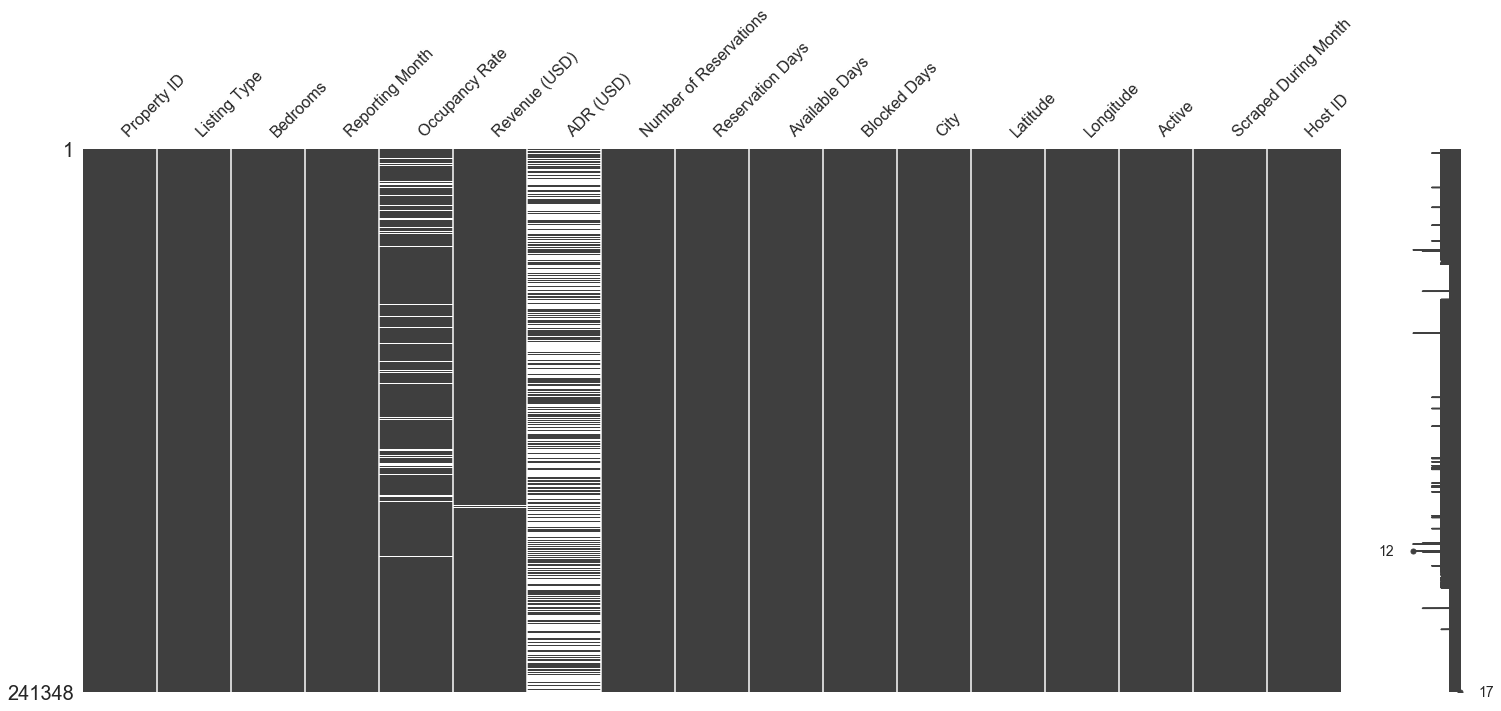

In [26]:
# missingness matrix
msno.matrix(airbnb_df)
plt.show()

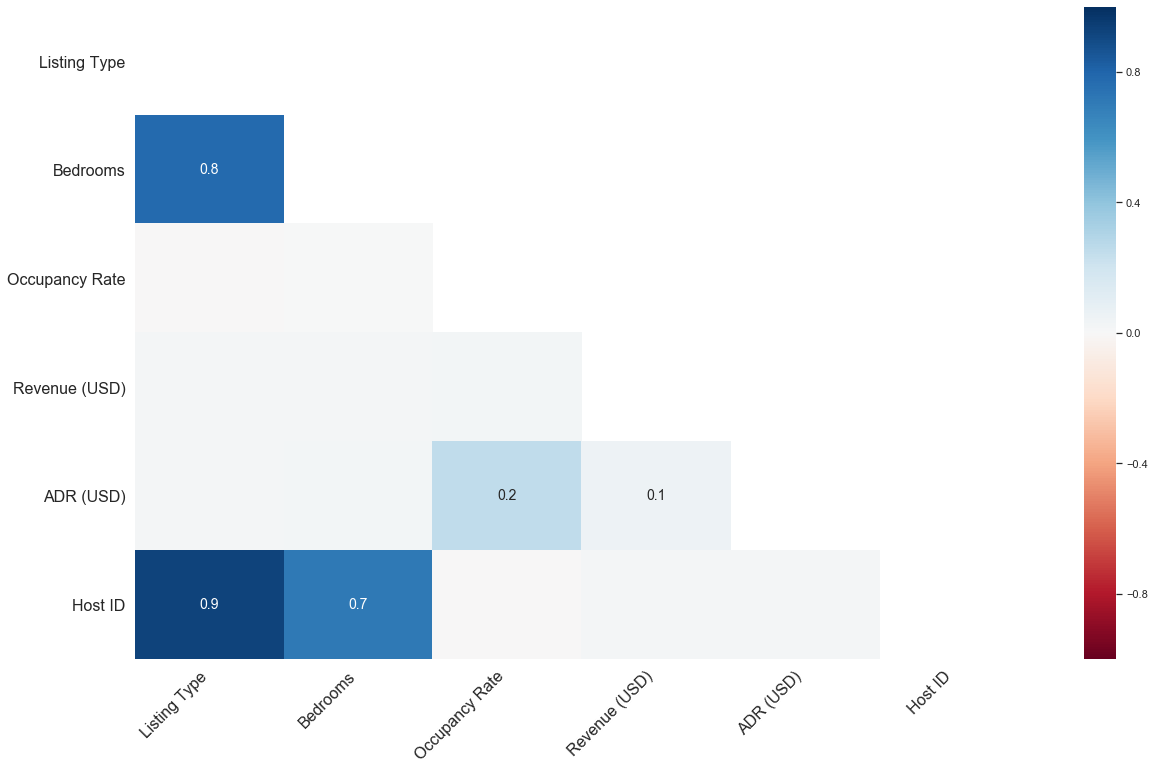

In [27]:
# missingness heatmap
msno.heatmap(airbnb_df)
plt.show()

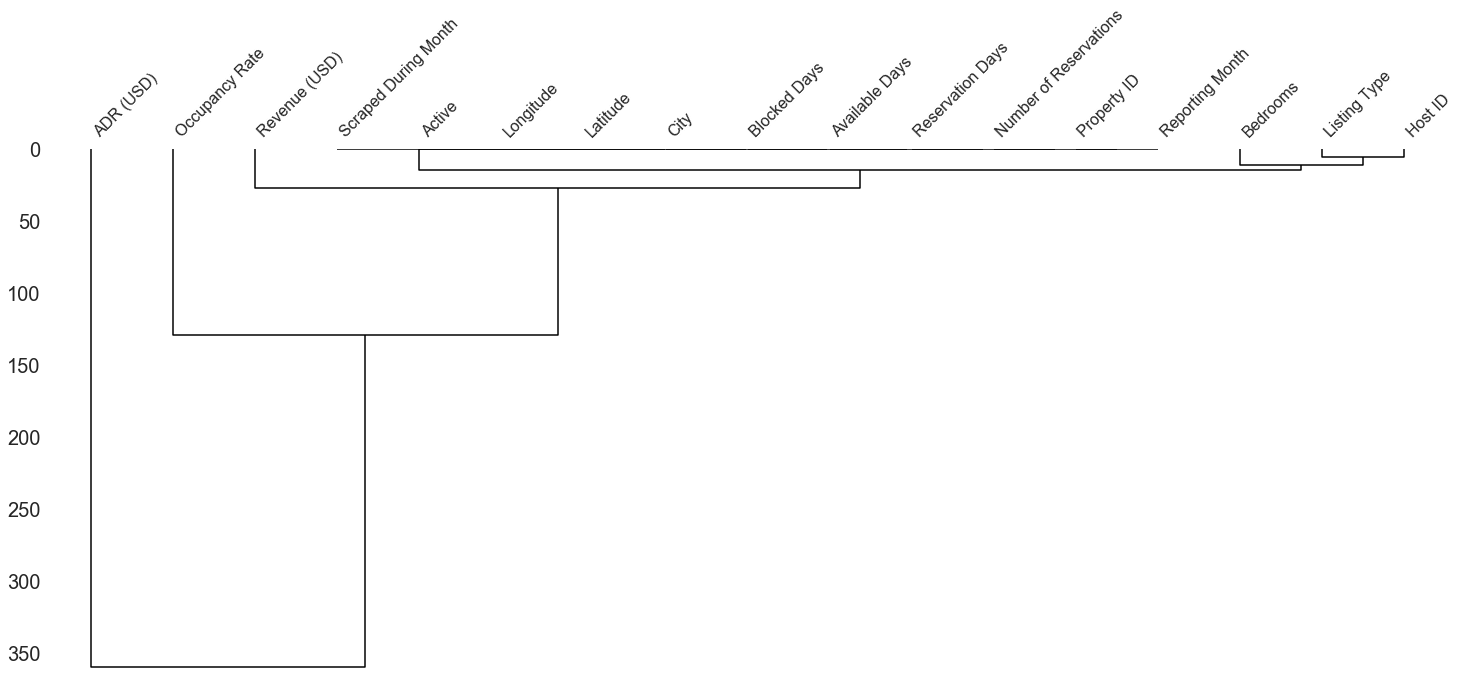

In [28]:
# dendrogram
msno.dendrogram(airbnb_df)
plt.show()

In [29]:
# Inspect the dataset subset where the Host ID is missing
airbnb_df[airbnb_df['Host ID'].isna()].describe(include='all')

,Property ID,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),ADR (USD),Number of Reservations,Reservation Days,Available Days,Blocked Days,City,Latitude,Longitude,Active,Scraped During Month,Host ID
count,1.880000e+02,28,28.0,188,180.000000,180.000000,12.000000,188.000000,188.000000,188.000000,188.000000,188,188.000000,188.000000,188,188,0.0
unique,NaN,2,NaN,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN
top,NaN,Private room,NaN,2017-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester,NaN,NaN,False,False,NaN
freq,NaN,21,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,153,NaN,NaN,162,166,NaN
first,NaN,NaN,NaN,2015-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.604864e+07,NaN,1.0,NaN,0.016906,42.400000,91.458333,0.095745,0.478723,18.042553,11.893617,NaN,53.145511,-2.050848,NaN,NaN,NaN
std,4.870401e+06,NaN,0.0,NaN,0.094480,239.097736,62.892932,0.464094,2.819826,13.903729,13.977039,NaN,0.674122,0.387032,NaN,NaN,NaN
min,3.841751e+06,NaN,1.0,NaN,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,NaN,51.732975,-2.346137,NaN,NaN,NaN
25%,1.725040e+07,NaN,1.0,NaN,0.000000,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,NaN,53.420383,-2.251066,NaN,NaN,NaN


From these results, it is safe to say the missing entries in `Occupancy Rate, Revenue (USD), ADR (USD)` are Missing Completely at Random (MCAR), whereas there seems to be some strong correlated patterns between the missing entries among the `[Listing Type, Bedrooms, Host ID]` columns. In particular, the columns `[Listing Type, Bedrooms, Host ID]` are almost always missing all together whenever there are missing entries in `[Listing Type/Host ID]`.

In [30]:
# check if there exists cases where we can use Property ID info to infer the missing Host ID
# i.e. the same Property ID have some missing entries in Host ID and some aren't
nan_host_PID = airbnb_df[airbnb_df['Host ID'].isna()]['Property ID']
with_host_PID = airbnb_df[np.logical_not(airbnb_df['Host ID'].isna())]['Property ID']

np.intersect1d(nan_host_PID, with_host_PID)

array([], dtype=float64)

# Dealing with missing data

After some brief analysis on the missing data patterns, we next consider how to deal with these missing data. 

Since there does not exist cases where we can use `Property ID` info to recover the missing `Host ID`, from simple reasonings, it is expected that it would in general be very difficult to identify the host only based on the above given fields. For this reason, we might simply remove the entries where `Host ID` is missing. This strategy removes only `<0.1%` of the total data and thus we don't need to worry too much about the information loss here.

$\color{blue}{\text{Removing entries where [Host ID] is missing}}$

In [31]:
airbnb_clean_df = airbnb_df.copy().dropna(subset=['Host ID'])
airbnb_clean_df.tail()

,Property ID,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),ADR (USD),Number of Reservations,Reservation Days,Available Days,Blocked Days,City,Latitude,Longitude,Active,Scraped During Month,Host ID
241343,32535267.0,Private room,1.0,2019-02-01,0.048,72.0,72.0,1,1,20,7,Manchester,53.48765,-2.25212,True,True,230120714.0
241344,32541519.0,Private room,1.0,2019-02-01,0.000,0.0,NaN,0,0,19,9,Manchester,53.46845,-2.24225,False,False,12484969.0
241345,32558796.0,Private room,0.0,2019-02-01,0.185,165.0,33.0,1,5,22,1,Manchester,53.46349,-2.24889,True,True,244625887.0
241346,32568462.0,Entire home/apt,1.0,2019-02-01,0.286,424.0,53.0,1,8,20,0,Manchester,53.47405,-2.54966,True,True,244749409.0
241347,32589426.0,Entire home/apt,0.0,2019-02-01,1.000,1120.0,40.0,1,28,0,0,Manchester,53.63279,-2.13356,True,True,62507742.0


$\color{blue}{\text{Missing entries in ADR (USD)}}$

Now let's inspect the entries where `ADR (USD)` is missing. 

From the first table below, we can see `ADR (USD)` is missing when values in `Occupancy Rate, Revenue (USD), Number of Reservations, Reservation Days` are zero. This demonstrates `ADR (USD)` is always missing when there are no reservations or bookings made. Moreover, after some careful studies, we can see `Revenue (USD)=ADR (USD)*Reservation Days`, see the second table below ($\color{blue}{\text{all the calculated ratios of LHS/RHS of above equation are very much equal to 1}}$). Thus we conclude we can simply drop the `ADR (USD)` column since the corresponding information is somewhat duplicating and can be easily retrieved using the formula above. 

In [32]:
airbnb_clean_df[airbnb_clean_df['ADR (USD)'].isna()].describe(include='all')

,Property ID,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),ADR (USD),Number of Reservations,Reservation Days,Available Days,Blocked Days,City,Latitude,Longitude,Active,Scraped During Month,Host ID
count,1.302040e+05,130204,130110.00000,130204,113635.0,129516.0,0.0,130204.0,130204.0,130204.000000,130204.000000,130204,130204.000000,130204.000000,130204,130204,1.302040e+05
unique,NaN,3,NaN,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN
top,NaN,Private room,NaN,2019-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Manchester,NaN,NaN,False,False,NaN
freq,NaN,74448,NaN,5628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93982,NaN,NaN,103711,71980,NaN
first,NaN,NaN,NaN,2014-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2019-02-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.447831e+07,NaN,1.40488,NaN,0.0,0.0,NaN,0.0,0.0,13.258978,17.101794,NaN,52.993001,-1.971061,NaN,NaN,5.924248e+07
std,6.985366e+06,NaN,0.95288,NaN,0.0,0.0,NaN,0.0,0.0,14.423456,14.420655,NaN,0.770511,0.457686,NaN,NaN,5.244846e+07
min,3.808500e+04,NaN,0.00000,NaN,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,NaN,51.712926,-2.713570,NaN,NaN,2.553000e+03
25%,9.366928e+06,NaN,1.00000,NaN,0.0,0.0,NaN,0.0,0.0,0.000000,0.000000,NaN,51.777184,-2.257012,NaN,NaN,1.754206e+07


In [33]:
# check if there exists relations between Revenue (USD), ADR (USD) and Reservation Days
airbnb_clean_df['Total Income'] = airbnb_clean_df['ADR (USD)']*airbnb_clean_df['Reservation Days']
airbnb_clean_df['Revenue/Income'] = airbnb_clean_df['Total Income']/airbnb_clean_df['Revenue (USD)']

airbnb_clean_df[['Revenue (USD)', 'Total Income', 'Revenue/Income']].describe(include='all')

,Revenue (USD),Total Income,Revenue/Income
count,240472.000000,110956.000000,110956.000000
mean,673.058929,1458.702673,1.000000
std,1378.090033,1723.347843,0.000041
min,0.000000,10.000000,0.999649
25%,0.000000,423.000000,0.999995
50%,0.000000,943.040000,1.000000
75%,840.000000,1927.435000,1.000004
max,57072.000000,57072.000000,1.000349


In [34]:
# drop ADR (USD) and derived (i.e. Total Income, Revenue/Income) columns
airbnb_clean_df.drop(columns=['ADR (USD)', 'Total Income', 'Revenue/Income'], inplace=True)

# Imputation

$\color{blue}{\text{Missing entries in Occupancy Rate, Revenue (USD)}}$

Next let's inspect the entries where `Occupancy Rate/Revenue (USD)` is missing. 

From tables below, we can see that `Occupancy Rate/Revenue (USD), Number of Reservations, Reservation Days` are all zero when either `Occupancy Rate/Revenue (USD)` is missing. This demonstrates the cases where either `Occupancy Rate/Revenue (USD)` is missing always correspond to airbnb properties without any reservations or transactions. As a result, we simply impute 0 for these missing entries here.

In [35]:
# check the entries pattern where Revenue (USD) is missing
airbnb_clean_df[airbnb_clean_df['Revenue (USD)'].isna()].describe(include='all')

,Property ID,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Number of Reservations,Reservation Days,Available Days,Blocked Days,City,Latitude,Longitude,Active,Scraped During Month,Host ID
count,6.880000e+02,688,688.000000,688,547.0,0.0,688.0,688.0,688.000000,688.000000,688,688.000000,688.000000,688,688,6.880000e+02
unique,NaN,3,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,2,2,NaN
top,NaN,Private room,NaN,2017-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Manchester,NaN,NaN,False,False,NaN
freq,NaN,330,NaN,89,NaN,NaN,NaN,NaN,NaN,NaN,571,NaN,NaN,529,484,NaN
first,NaN,NaN,NaN,2014-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.377139e+07,NaN,1.145349,NaN,0.0,NaN,0.0,0.0,23.143895,7.167151,NaN,53.193558,-2.071710,NaN,NaN,5.581545e+07
std,3.477597e+06,NaN,0.430742,NaN,0.0,NaN,0.0,0.0,12.471379,12.480656,NaN,0.652810,0.383101,NaN,NaN,3.764221e+07
min,2.876435e+06,NaN,0.000000,NaN,0.0,NaN,0.0,0.0,0.000000,0.000000,NaN,51.740832,-2.479245,NaN,NaN,8.011100e+04
25%,1.317712e+07,NaN,1.000000,NaN,0.0,NaN,0.0,0.0,22.750000,0.000000,NaN,53.444157,-2.265610,NaN,NaN,1.997020e+07


In [36]:
# check the entries pattern where Occupancy Rate is missing
airbnb_clean_df[airbnb_clean_df['Occupancy Rate'].isna()].describe(include='all')

,Property ID,Listing Type,Bedrooms,Reporting Month,Occupancy Rate,Revenue (USD),Number of Reservations,Reservation Days,Available Days,Blocked Days,City,Latitude,Longitude,Active,Scraped During Month,Host ID
count,1.656900e+04,16569,16552.000000,16569,0.0,16428.0,16569.0,16569.0,16569.0,16569.000000,16569,16569.000000,16569.000000,16569,16569,1.656900e+04
unique,NaN,3,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,1,2,NaN
top,NaN,Private room,NaN,2017-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,Manchester,NaN,NaN,False,True,NaN
freq,NaN,9386,NaN,1543,NaN,NaN,NaN,NaN,NaN,NaN,10874,NaN,NaN,16569,9334,NaN
first,NaN,NaN,NaN,2014-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-06-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.005538e+07,NaN,1.428287,NaN,NaN,0.0,0.0,0.0,0.0,30.363571,NaN,52.877820,-1.902226,NaN,NaN,3.588280e+07
std,4.399834e+06,NaN,0.959354,NaN,NaN,0.0,0.0,0.0,0.0,0.859444,NaN,0.814105,0.478852,NaN,NaN,2.703639e+07
min,6.895100e+04,NaN,0.000000,NaN,NaN,0.0,0.0,0.0,0.0,28.000000,NaN,51.713845,-2.709775,NaN,NaN,2.553000e+03
25%,6.666836e+06,NaN,1.000000,NaN,NaN,0.0,0.0,0.0,0.0,30.000000,NaN,51.760850,-2.249060,NaN,NaN,1.282776e+07


In [37]:
# impute zero for missing entries in Occupancy Rate, Revenue (USD)
airbnb_clean_df['Occupancy Rate'].fillna(0, inplace=True)
airbnb_clean_df['Revenue (USD)'].fillna(0, inplace=True)

$\color{blue}{\text{Advanced imputation (e.g. using KNN/Random Forest) for the remaining missing entries in Bedrooms}}$

Finally we impute the remaining 4 missing entries in `Bedrooms`. We apply KNN (n_neighbors = 5) algorithm here. The final imputed dataframe has `241,160` entries.

In [38]:
from sklearn.impute import KNNImputer

KNN_imputer = KNNImputer(n_neighbors=5)

# columns with missing entries
missing_col = airbnb_clean_df.columns[airbnb_clean_df.isna().any()]

airbnb_clean_df[missing_col] = KNN_imputer.fit_transform(airbnb_clean_df[missing_col]).astype(int) # no. of Bedroom=int

# Aggregating the data by Property ID to get yearly averages

Next, we aggregate the data by `Property ID` to create a new dataframe of yearly averages (up to year 2017, excluding 2018-2019 data) of the suitable fields, i.e. `[Occupancy Rate, Revenue (USD), Number of Reservations, Reservation Days, Available Days]`. Note that `Occupancy Rate` is defined as the ratio of occupancy, which is within the range `[0,1]`.

The reason for using only data up to year 2017 is because here we are predicting the property "hotness" in 2018 and we want this newly aggregated dataframe contains only information of historical data. This can also prevent data leakage (as we will use `[Revenue (USD), Number of Reservations]` in 2018 to construct a target variable).

In [39]:
# create a year column
airbnb_clean_df['Year'] = airbnb_clean_df['Reporting Month'].dt.year

In [40]:
# create a table of yearly averages of the suitable fields
col_to_agg_mean = ['Occupancy Rate', 'Revenue (USD)', 'Number of Reservations', 'Reservation Days', 'Available Days', 
                   'Blocked Days']
airbnb_by_PID_and_year = airbnb_clean_df[airbnb_clean_df['Year']<2018].groupby(['Property ID', 'Year'])
airbnb_by_PID_year_tot = airbnb_by_PID_and_year[col_to_agg_mean].sum().reset_index()
airbnb_by_PID_year_tot['Occupancy Rate'] = airbnb_by_PID_year_tot['Occupancy Rate']/12 # Occupancy Rate should be pct

agg_mean_col = ['Yr Avg Occupancy Rate', 'Yr Avg Revenue (USD)', 'Yr Avg Number of Reservations', 
                'Yr Avg Reservation Days', 'Yr Avg Available Days', 'Yr Avg Blocked Days']
airbnb_year_avg_df = pd.DataFrame()
airbnb_year_avg_df[agg_mean_col] = airbnb_by_PID_year_tot.groupby(['Property ID'])[col_to_agg_mean].mean()

In [41]:
airbnb_year_avg_df.head()

,Yr Avg Occupancy Rate,Yr Avg Revenue (USD),Yr Avg Number of Reservations,Yr Avg Reservation Days,Yr Avg Available Days,Yr Avg Blocked Days
Property ID,,,,,,
38085.0,0.285667,2429.00,16.000000,82.000000,161.5,53.500000
39524.0,0.440688,5534.25,43.750000,116.250000,102.5,55.250000
68951.0,0.555312,15721.71,20.250000,159.750000,46.5,90.750000
77423.0,0.000000,0.00,0.000000,0.000000,213.0,0.000000
84629.0,0.094583,314.00,2.333333,7.333333,87.0,88.333333


# Filter out the data between 2018 and 2019 and aggregate monthly data to year total

In this task, we are only interested in the 2018 data. Thus here we filter out the 2018 data and aggregate the monthly values into year total for the appropriate fields. We first check which fields are to be aggregated.

In [42]:
airbnb_18_clean_df = airbnb_clean_df[airbnb_clean_df['Year']==2018]

# check whether aggregate non-trivial columns or not
check_col = ['Listing Type', 'Bedrooms', 'City', 'Latitude', 'Longitude', 'Active', 'Scraped During Month', 
               'Host ID']
airbnb_by_PID = airbnb_18_clean_df.groupby(['Property ID'])
airbnb_18_nunique_df = airbnb_by_PID[check_col].nunique()
airbnb_18_nunique_df.nunique()

Listing Type            1
Bedrooms                1
City                    1
Latitude                1
Longitude               1
Active                  2
Scraped During Month    2
Host ID                 1
dtype: int64

From the above, we can see there could be 2 unique values for both the `[Active, Scraped During Month]` fields for the same airbnb property. As a result, we should aggregate them into `[Tot Active Months, Scraped During Month (bool Tot)]`.

In [43]:
# aggregate monthly data to year total
col_to_agg_tot = ['Occupancy Rate', 'Revenue (USD)', 'Number of Reservations', 'Reservation Days', 'Available Days', 
                   'Blocked Days', 'Active', 'Scraped During Month']
agg_tot_col = ['Avg Occupancy Rate', 'Tot Revenue (USD)', 'Tot Number of Reservations', 
                'Tot Reservation Days', 'Tot Available Days', 'Tot Blocked Days', 
                'Tot Active Months', 'Scraped During Month (bool Tot)']
airbnb_18_agg_df = airbnb_by_PID[col_to_agg_tot].sum()
airbnb_18_agg_df['Occupancy Rate'] = airbnb_18_agg_df['Occupancy Rate']/12  # Occupancy Rate should be pct
airbnb_18_agg_df.columns = agg_tot_col

# get the unique values for non-aggregated column
non_agg_col = ['Listing Type', 'Bedrooms', 'City', 'Latitude', 'Longitude', 'Host ID']
airbnb_18_agg_df[non_agg_col] = airbnb_by_PID[non_agg_col].first()

In [44]:
# Inspect the final aggregated dataframe
airbnb_18_agg_df.head()

,Avg Occupancy Rate,Tot Revenue (USD),Tot Number of Reservations,Tot Reservation Days,Tot Available Days,Tot Blocked Days,Tot Active Months,Scraped During Month (bool Tot),Listing Type,Bedrooms,City,Latitude,Longitude,Host ID
Property ID,,,,,,,,,,,,,,
38085.0,0.468583,3758.00,23,130,110,125,11.0,12.0,Private room,1,Manchester,53.613312,-2.101864,163420.0
68951.0,0.541583,10725.84,15,113,20,232,9.0,12.0,Entire home/apt,2,Manchester,53.562140,-2.533050,341682.0
85109.0,0.638583,19207.00,87,229,130,6,12.0,12.0,Private room,1,Manchester,53.480740,-2.231860,465854.0
87535.0,0.000000,0.00,0,0,212,0,0.0,0.0,Private room,1,Oxford,51.776051,-1.235621,6659668.0
146761.0,0.668333,19147.71,22,173,31,161,10.0,12.0,Entire home/apt,2,Oxford,51.741330,-1.252910,709460.0


Finally we combine this aggregated dataframe with the yearly average dataframe created in the previous section. The resulting dataframes have `11265` distinct airbnb properties with 20 fields.

In [45]:
# Combine this aggregated dataframe with the yearly average dataframe
airbnb_18_final_df = airbnb_18_agg_df.join(airbnb_year_avg_df)
airbnb_agg_final_df = airbnb_18_final_df.copy()

airbnb_18_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11265 entries, 38085.0 to 31210006.0
Data columns (total 20 columns):
Avg Occupancy Rate                 11265 non-null float64
Tot Revenue (USD)                  11265 non-null float64
Tot Number of Reservations         11265 non-null int64
Tot Reservation Days               11265 non-null int64
Tot Available Days                 11265 non-null int64
Tot Blocked Days                   11265 non-null int64
Tot Active Months                  11265 non-null float64
Scraped During Month (bool Tot)    11265 non-null float64
Listing Type                       11265 non-null object
Bedrooms                           11265 non-null int64
City                               11265 non-null object
Latitude                           11265 non-null float64
Longitude                          11265 non-null float64
Host ID                            11265 non-null float64
Yr Avg Occupancy Rate              6982 non-null float64
Yr Avg Revenue (USD) 

$\color{blue}{\text{Imputing missing entries in the combined dataframe}}$

From above, we can see there are missing entries as not all airbnb properties listed in the 2018 data have historical data. We will impute -1 for these missing entries here.

In [46]:
for col in agg_mean_col:
    airbnb_18_final_df[col].fillna(-1, inplace=True)

# How we define and quantify the "hotness" of the property

Next we discuss how we define and quantify the "hotness" of the property. As a real estate investment company, we are mostly interested in property that are most profitable and popular. With this in mind, we will treat `Tot Revenue (USD), Tot Number of Reservations` as the target variables and construct a combined airbnb performance metric from them. We consider same weightings for both `Tot Revenue (USD), Tot Number of Reservations` here. In order to do so, we would need to standardise them first. 

$\color{blue}{\text{Standardise the target variables}}$

In [47]:
from sklearn.preprocessing import StandardScaler

airbnb_18_preprocessed_df = airbnb_18_final_df.copy()
target_col = ['Tot Revenue (USD)', 'Tot Number of Reservations']

scaler = StandardScaler()
airbnb_18_preprocessed_df[target_col] = scaler.fit_transform(airbnb_18_preprocessed_df[target_col])

We are interested in airbnb property which is profitable and popular across the whole year. For this reason, let's construct a combined evaluation target metric defined as the sum of scaled monthly average revenue and scaled monthly number of reservations, i.e. `(Tot Revenue (USD) + Tot Number of Reservations)/12`. 

For simplicity, let's classify the properties which have `Target Performance`>0.4 as "hot". There are `302`, which is about 2.8% of the properties are considered 'hot' by this definition. The threshold we chose here is somewhat arbitrary. In practice, it would depend on the investment budget and the target expected return. Alternatively, one might try predicting the derived `Target Performance` metric instead.

$\color{blue}{\text{(Tot Revenue (USD), scaled + Tot Number of Reservations, scaled)/12}}$

In [48]:
# construct a combined evaluation target metric
airbnb_18_preprocessed_df['Target Performance'] = airbnb_18_preprocessed_df['Tot Revenue (USD)']/12 + \
                                                    airbnb_18_preprocessed_df['Tot Number of Reservations']/12

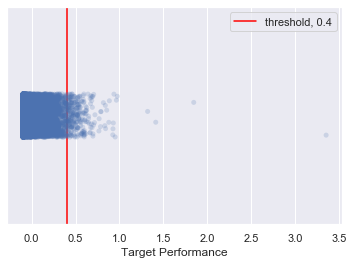

In [49]:
# Visualise the distribution of the derived target performance metric
sns.stripplot(x=airbnb_18_preprocessed_df['Target Performance'], alpha=0.2, jitter=True)
plt.axvline(0.4, label='threshold, 0.4', color='red')
plt.legend()
plt.show()

In [50]:
# classify property with Target Performance > 0.4 as "hot"
airbnb_18_final_df["hot"] = airbnb_18_preprocessed_df['Target Performance'] > 0.4
airbnb_18_final_df["hot"].value_counts()

False    10963
True       302
Name: hot, dtype: int64

# Exploratory data analysis (EDA)

Now let's do some exploratory data analysis. First, we check if there are any outliers and invalid entries. From the summary stats info and the basic inference, we can conclude the entries are valid where they are within reasonable expected range and the categorical labels are correct.

In [51]:
# drop the target variables
airbnb_18_final_df.drop(columns=['Tot Revenue (USD)', 'Tot Number of Reservations'], inplace=True)

airbnb_18_final_df.describe(include='all')

,Avg Occupancy Rate,Tot Reservation Days,Tot Available Days,Tot Blocked Days,Tot Active Months,Scraped During Month (bool Tot),Listing Type,Bedrooms,City,Latitude,Longitude,Host ID,Yr Avg Occupancy Rate,Yr Avg Revenue (USD),Yr Avg Number of Reservations,Yr Avg Reservation Days,Yr Avg Available Days,Yr Avg Blocked Days,hot
count,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265,11265.000000,11265,11265.000000,11265.000000,1.126500e+04,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265.000000,11265
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Private room,NaN,Manchester,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,5932,NaN,8159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10963
mean,0.193004,57.317976,95.959964,110.391922,4.679805,5.650688,NaN,1.438526,NaN,52.997669,-1.973115,8.323452e+07,-0.257538,3740.360006,11.280041,35.519855,59.287498,49.375351,NaN
std,0.238649,74.801102,98.031652,109.942292,4.287788,4.697966,NaN,0.973808,NaN,0.768627,0.456638,6.663265e+07,0.599359,7628.523593,20.066310,53.742297,78.236488,73.089364,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,51.712926,-2.713570,2.553000e+03,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
25%,0.000000,0.000000,16.000000,13.000000,1.000000,1.000000,NaN,1.000000,NaN,51.779090,-2.256548,2.477296e+07,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,NaN
50%,0.083333,21.000000,63.000000,74.000000,3.000000,5.000000,NaN,1.000000,NaN,53.455665,-2.229550,6.555766e+07,0.020833,336.000000,1.500000,5.000000,25.000000,11.000000,NaN
75%,0.319667,91.000000,149.000000,181.000000,8.000000,12.000000,NaN,2.000000,NaN,53.482380,-1.271287,1.347406e+08,0.202208,4151.000000,15.250000,56.000000,96.000000,76.500000,NaN


$\color{blue}{\text{EDA on categorical variables}}$

Categorical/Boolean variables: `[Listing Type, City]`. Now let's study their corresponding distributions and the portions of "hot" properties per each categorical classes. From the plot below, we can see most of the airbnb properties are `Private room` or `Entire home/apt` and there are nearly triple more properties in Manchester compared to that in Oxford.

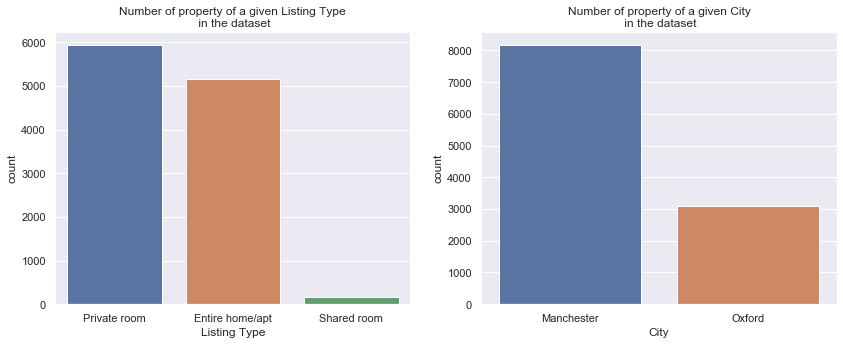

In [52]:
# countplots

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=False, figsize =(14,5) )
sns.countplot(x='Listing Type', data=airbnb_18_final_df, ax=ax1)
sns.countplot(x='City', data=airbnb_18_final_df, ax=ax2)
ax1.set_title("Number of property of a given Listing Type\n in the dataset")
ax2.set_title("Number of property of a given City\n in the dataset")
plt.show()

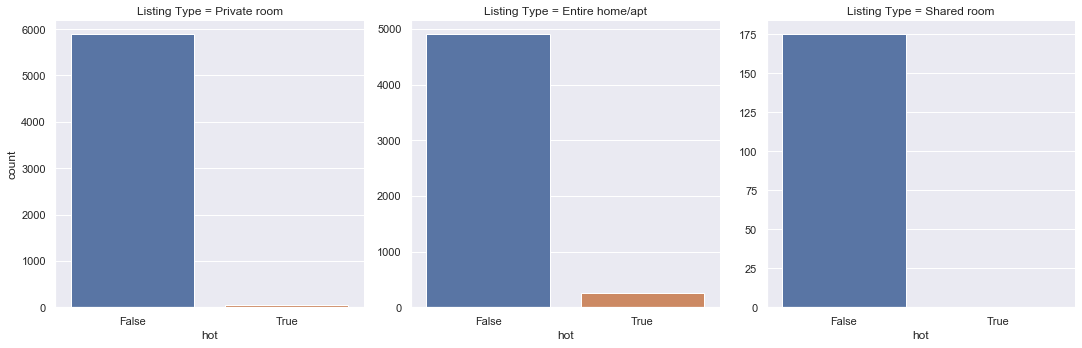

In [53]:
sns.factorplot(x='hot', col='Listing Type', kind='count', data=airbnb_18_final_df, sharey=False)
plt.show()

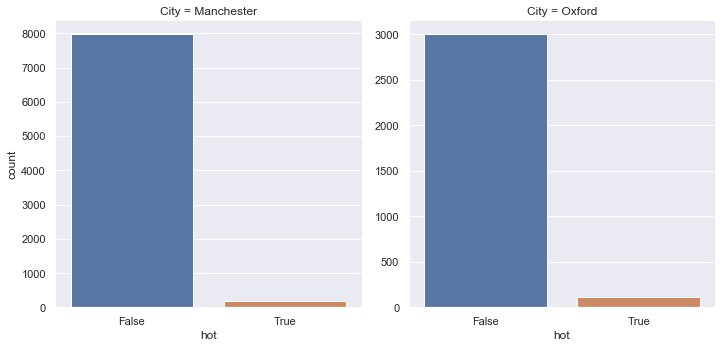

In [54]:
sns.factorplot(x='hot', col='City', kind='count', data=airbnb_18_final_df, sharey=False)
plt.show()

In [55]:
def get_prob_per_class_within_one_cat_feat(feature_col, df):
    """
    Function that returns the probabilities of entries of a certain class in one 
    particular feature variable having the target=1 in the dataset df (i.e. 
    classified as 'hot' property)

    Parameters
    ----------
    feature_col: str
        The particular feature variable of interest.
    
    df : Dataframe
        The input dataframe containing the dataset.

    Returns
    -------
    prob_per_cat_class_df: Dataframe
        A dataframe with the probabilities of entries of a certain class in one 
    particular feature variable having the target=1


    """
    prob_per_cat_class_df = pd.DataFrame(columns=[feature_col, 'sample_size', 'prob of target=1'])
    class_label_list = []
    prob_list = []
    sample_size_list = []
    for class_label in df[feature_col].dropna().unique():
        hot_tot = df[df[feature_col]==class_label].hot.sum()
        tot_count = df[df[feature_col]==class_label].hot.count()
        sample_size_list.append(tot_count)
        class_label_list.append(class_label)
        prob_list.append(hot_tot/tot_count)
    prob_per_cat_class_df[feature_col] = class_label_list
    prob_per_cat_class_df['prob of target=1'] = prob_list
    prob_per_cat_class_df['sample_size'] = sample_size_list
    return prob_per_cat_class_df

In [56]:
cat_col = ['Listing Type', 'City']
prob_df = {}
for cat_var in cat_col:
    print(f"Categorical variable: {cat_var}")
    prob_df[cat_var] = get_prob_per_class_within_one_cat_feat(cat_var, airbnb_18_final_df)
    print(prob_df[cat_var])
    print("-"*30, "\n")

Categorical variable: Listing Type
      Listing Type  sample_size  prob of target=1
0     Private room         5932          0.007923
1  Entire home/apt         5158          0.049438
2      Shared room          175          0.000000
------------------------------ 

Categorical variable: City
         City  sample_size  prob of target=1
0  Manchester         8159          0.023655
1      Oxford         3106          0.035093
------------------------------ 



From the above plots, we can see there seem to be a strong correlation between `Listing Type` and whether the property is classified as 'hot', whereas the correlation is very weak for the case of `City`. We therefore expect `Listing Type` is useful for predicting whether a property is 'hot'.

$\color{blue}{\text{EDA on ordinal variables}}$

Next we perform EDA on ordinal variables: `[Tot Active Months, Scraped During Month (bool Tot), Bedrooms]`. 

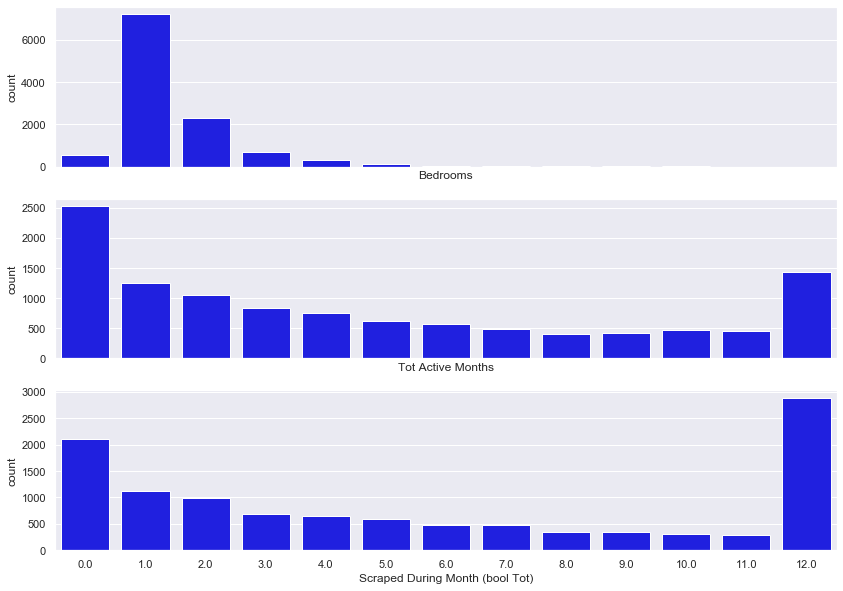

In [57]:
# distributions of each ordinal labels

fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, sharex=True, figsize =(14,10) )
sns.countplot(x='Bedrooms', data=airbnb_18_final_df, ax=ax1, color='blue')
sns.countplot(x='Tot Active Months', data=airbnb_18_final_df, ax=ax2, color='blue')
sns.countplot(x='Scraped During Month (bool Tot)', data=airbnb_18_final_df, ax=ax3, color='blue')
plt.show()

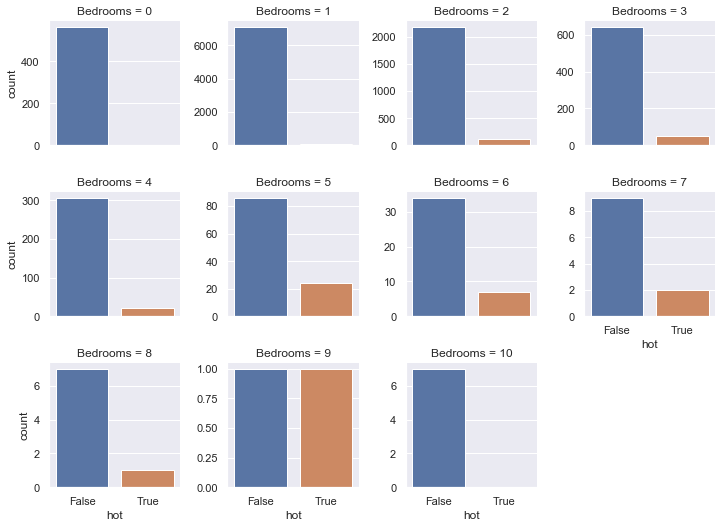

In [58]:
sns.catplot("hot", col="Bedrooms", col_wrap=4, data=airbnb_18_final_df,
            kind="count", height=2.5, aspect=1, sharey=False)

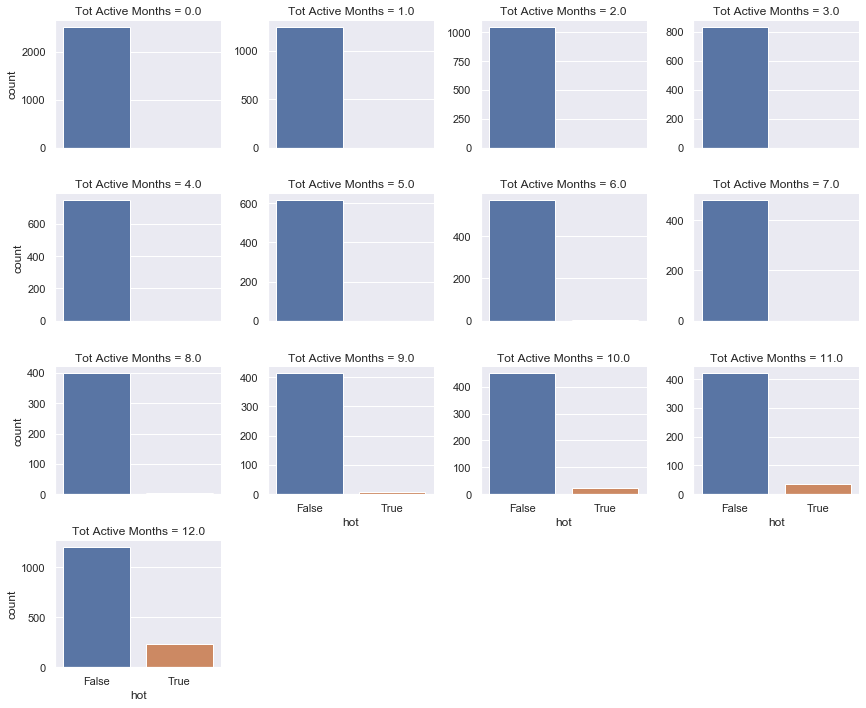

In [59]:
sns.catplot("hot", col="Tot Active Months", col_wrap=4, data=airbnb_18_final_df,
            kind="count", height=2.5, aspect=1.2, sharey=False)

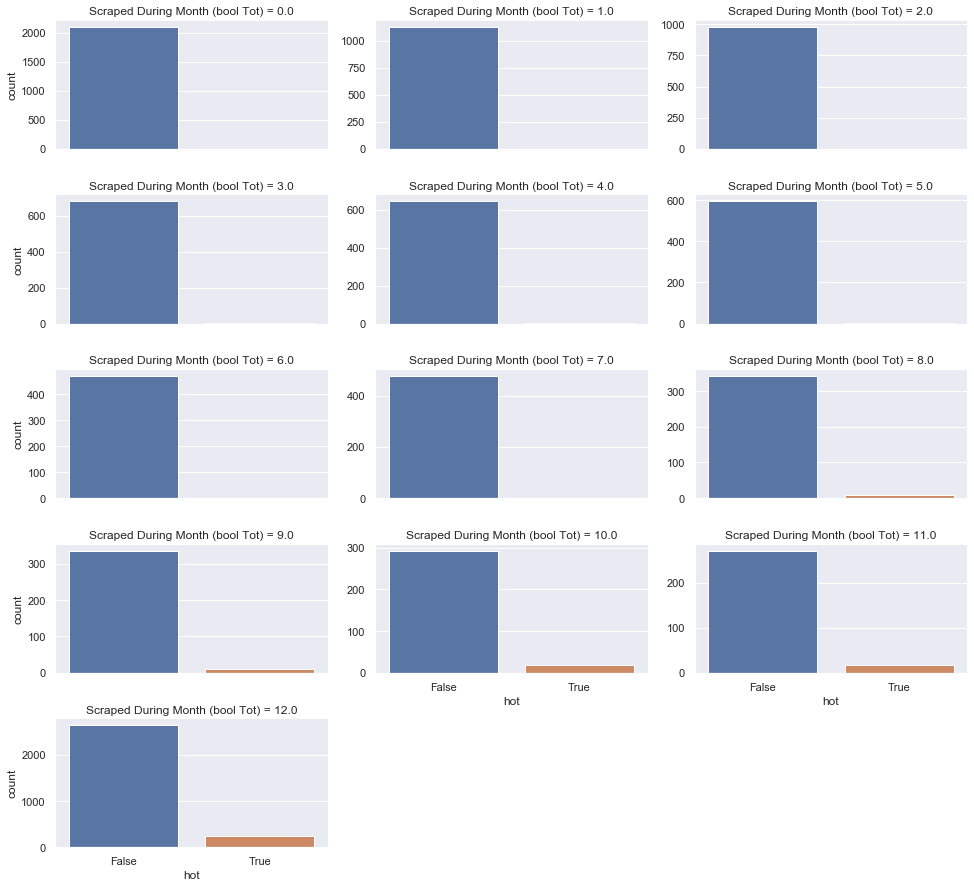

In [60]:
sns.catplot("hot", col="Scraped During Month (bool Tot)", col_wrap=3, data=airbnb_18_final_df,
            kind="count", height=2.5, aspect=1.8, sharey=False)
plt.show()

From the above plots, we can see there seem to be a strong correlation between `[Tot Active Months, Tot Scraped During Month, Bedrooms]` and the binary target label `hot` we defined, i.e. there is a higher probability of being 'hot' with a large `[Tot Active Months/Tot Scraped During Month/Bedrooms]` (except for the case where `Bedrooms`=10). This agrees with what one would naively expect and therefore we expect `[Tot Active Months, Tot Scraped During Month, Bedrooms]` would be predictive here.

$\color{blue}{\text{EDA on numerical variables}}$

Next we perform EDA on numerical variables. For time constraint reasons, we shall only study a few of them here.

Numerical variables: `[Avg Occupancy Rate, Tot Reservation Days, Yr Avg Revenue (USD)]`. We study and visualise the distributions of these numerical columns per each binary 'hot' class (i.e. True or False).

$\color{blue}{\text{Average Occupancy Rate}}$

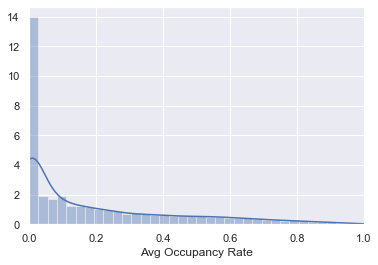

In [61]:
# Density plot for Avg Occupancy Rate 
max_occ = max(airbnb_18_final_df['Avg Occupancy Rate'])
sns.distplot(airbnb_18_final_df['Avg Occupancy Rate'], norm_hist=True, kde=True).set(xlim=(0, max_occ))
plt.show()

In [62]:
def plot_num_var_vio_strip(df, num_var):
    """
    Function that returns violin and strip plots of the given numeric variable
    for each binary target groups in the dataset df 
    Parameters
    ----------    
    df : Dataframe
        The input dataframe containing the (healthcare) dataset
        
    num_var : str
        The numeric variable to be plotted

    """
    fig, ax =  plt.subplots(ncols=2, sharey=True, figsize =(12,5))
    sns.violinplot(x='hot', y=num_var, data=df, ax=ax[0])
    sns.stripplot(x='hot', y=num_var, data=df, alpha=0.2, jitter=True, ax=ax[1])

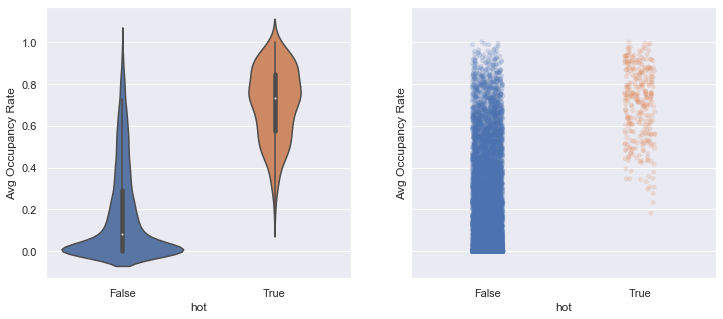

In [63]:
plot_num_var_vio_strip(airbnb_18_final_df, 'Avg Occupancy Rate')

$\color{blue}{\text{Total Reservation Days}}$

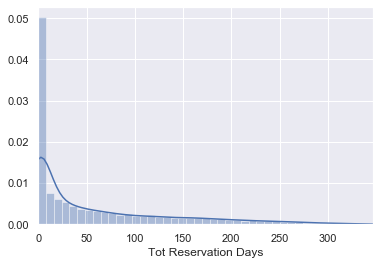

In [64]:
# Density plot for Tot Reservation Days 
max_tot_reserve = max(airbnb_18_final_df['Tot Reservation Days'])
sns.distplot(airbnb_18_final_df['Tot Reservation Days'], hist=True, kde=True).set(xlim=(0, max_tot_reserve))
plt.show()

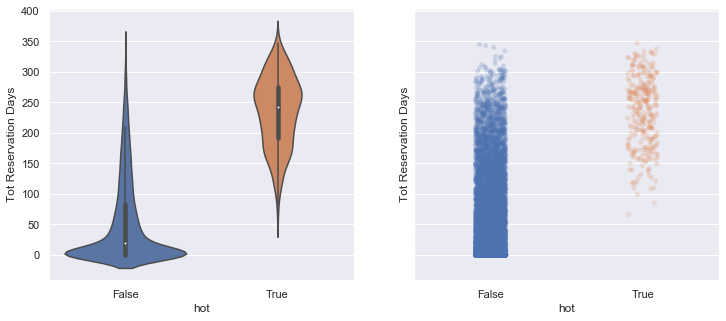

In [65]:
plot_num_var_vio_strip(airbnb_18_final_df, 'Tot Reservation Days')

$\color{blue}{\text{Yearly Average Revenue (USD) }}$

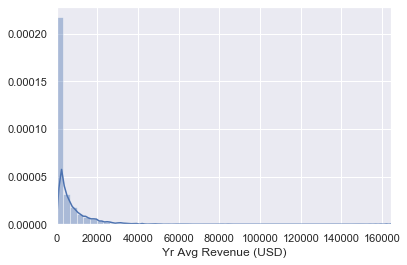

In [66]:
# Density plot for Yr Avg Revenue (USD) 
max_yr_avg_reserve = max(airbnb_18_final_df['Yr Avg Revenue (USD)'])
sns.distplot(airbnb_18_final_df['Yr Avg Revenue (USD)'], hist=True, kde=True).set(xlim=(0, max_yr_avg_reserve))
plt.show()

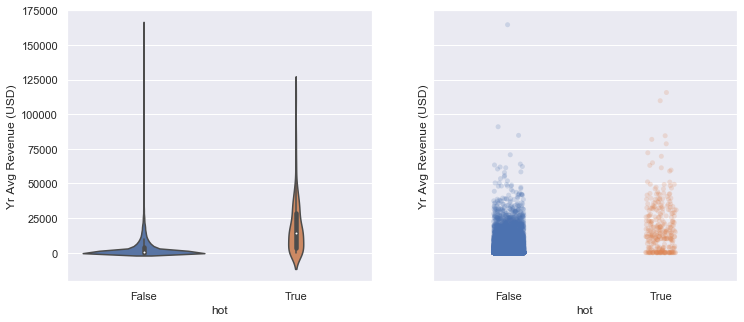

In [67]:
plot_num_var_vio_strip(airbnb_18_final_df, 'Yr Avg Revenue (USD)')

From these plots, we can see `[Avg Occupancy Rate, Tot Reservation Days, Yr Avg Revenue (USD)]` all follow a Poisson-like distribution. And the distributions are quite different between properties that are considered 'hot' and those aren't.

# Preprocessing: 1) label encoding

In this dataset, all the categorical variables `[Listing Type, City]` are nominal variables. In this case, we can simply apply the same encoder to all categorical variables, either using `pd.get_dummies` or `OneHotEncoder` (the latter is preferred as it can handle unseen labels).

If there exists ordinal categorical variables, it is more appropriate to apply just the `LabelEncoder` or `OrdinalEncoder` in that case.

In [68]:
nominal_col = ['Listing Type', 'City']

# "One-Hot" encoding, nominal variables, using pd.get_dummies
airbnb_18_encoded_df = pd.get_dummies(airbnb_18_final_df, columns = nominal_col)

# rearrange and make the target label 'hot' as the last column
hot = airbnb_18_encoded_df['hot']
airbnb_18_encoded_df.drop(columns=['hot'], inplace=True)
airbnb_18_encoded_df['hot'] = hot

# Correlation Study

Now, let's perform the correlation analysis between the variables in this airbnb dataset. We are particularly interested in how strongly/weakly the binary target label (`hot`) is correlated with the feature variables. We will use the Pearson's correlation coefficient here.

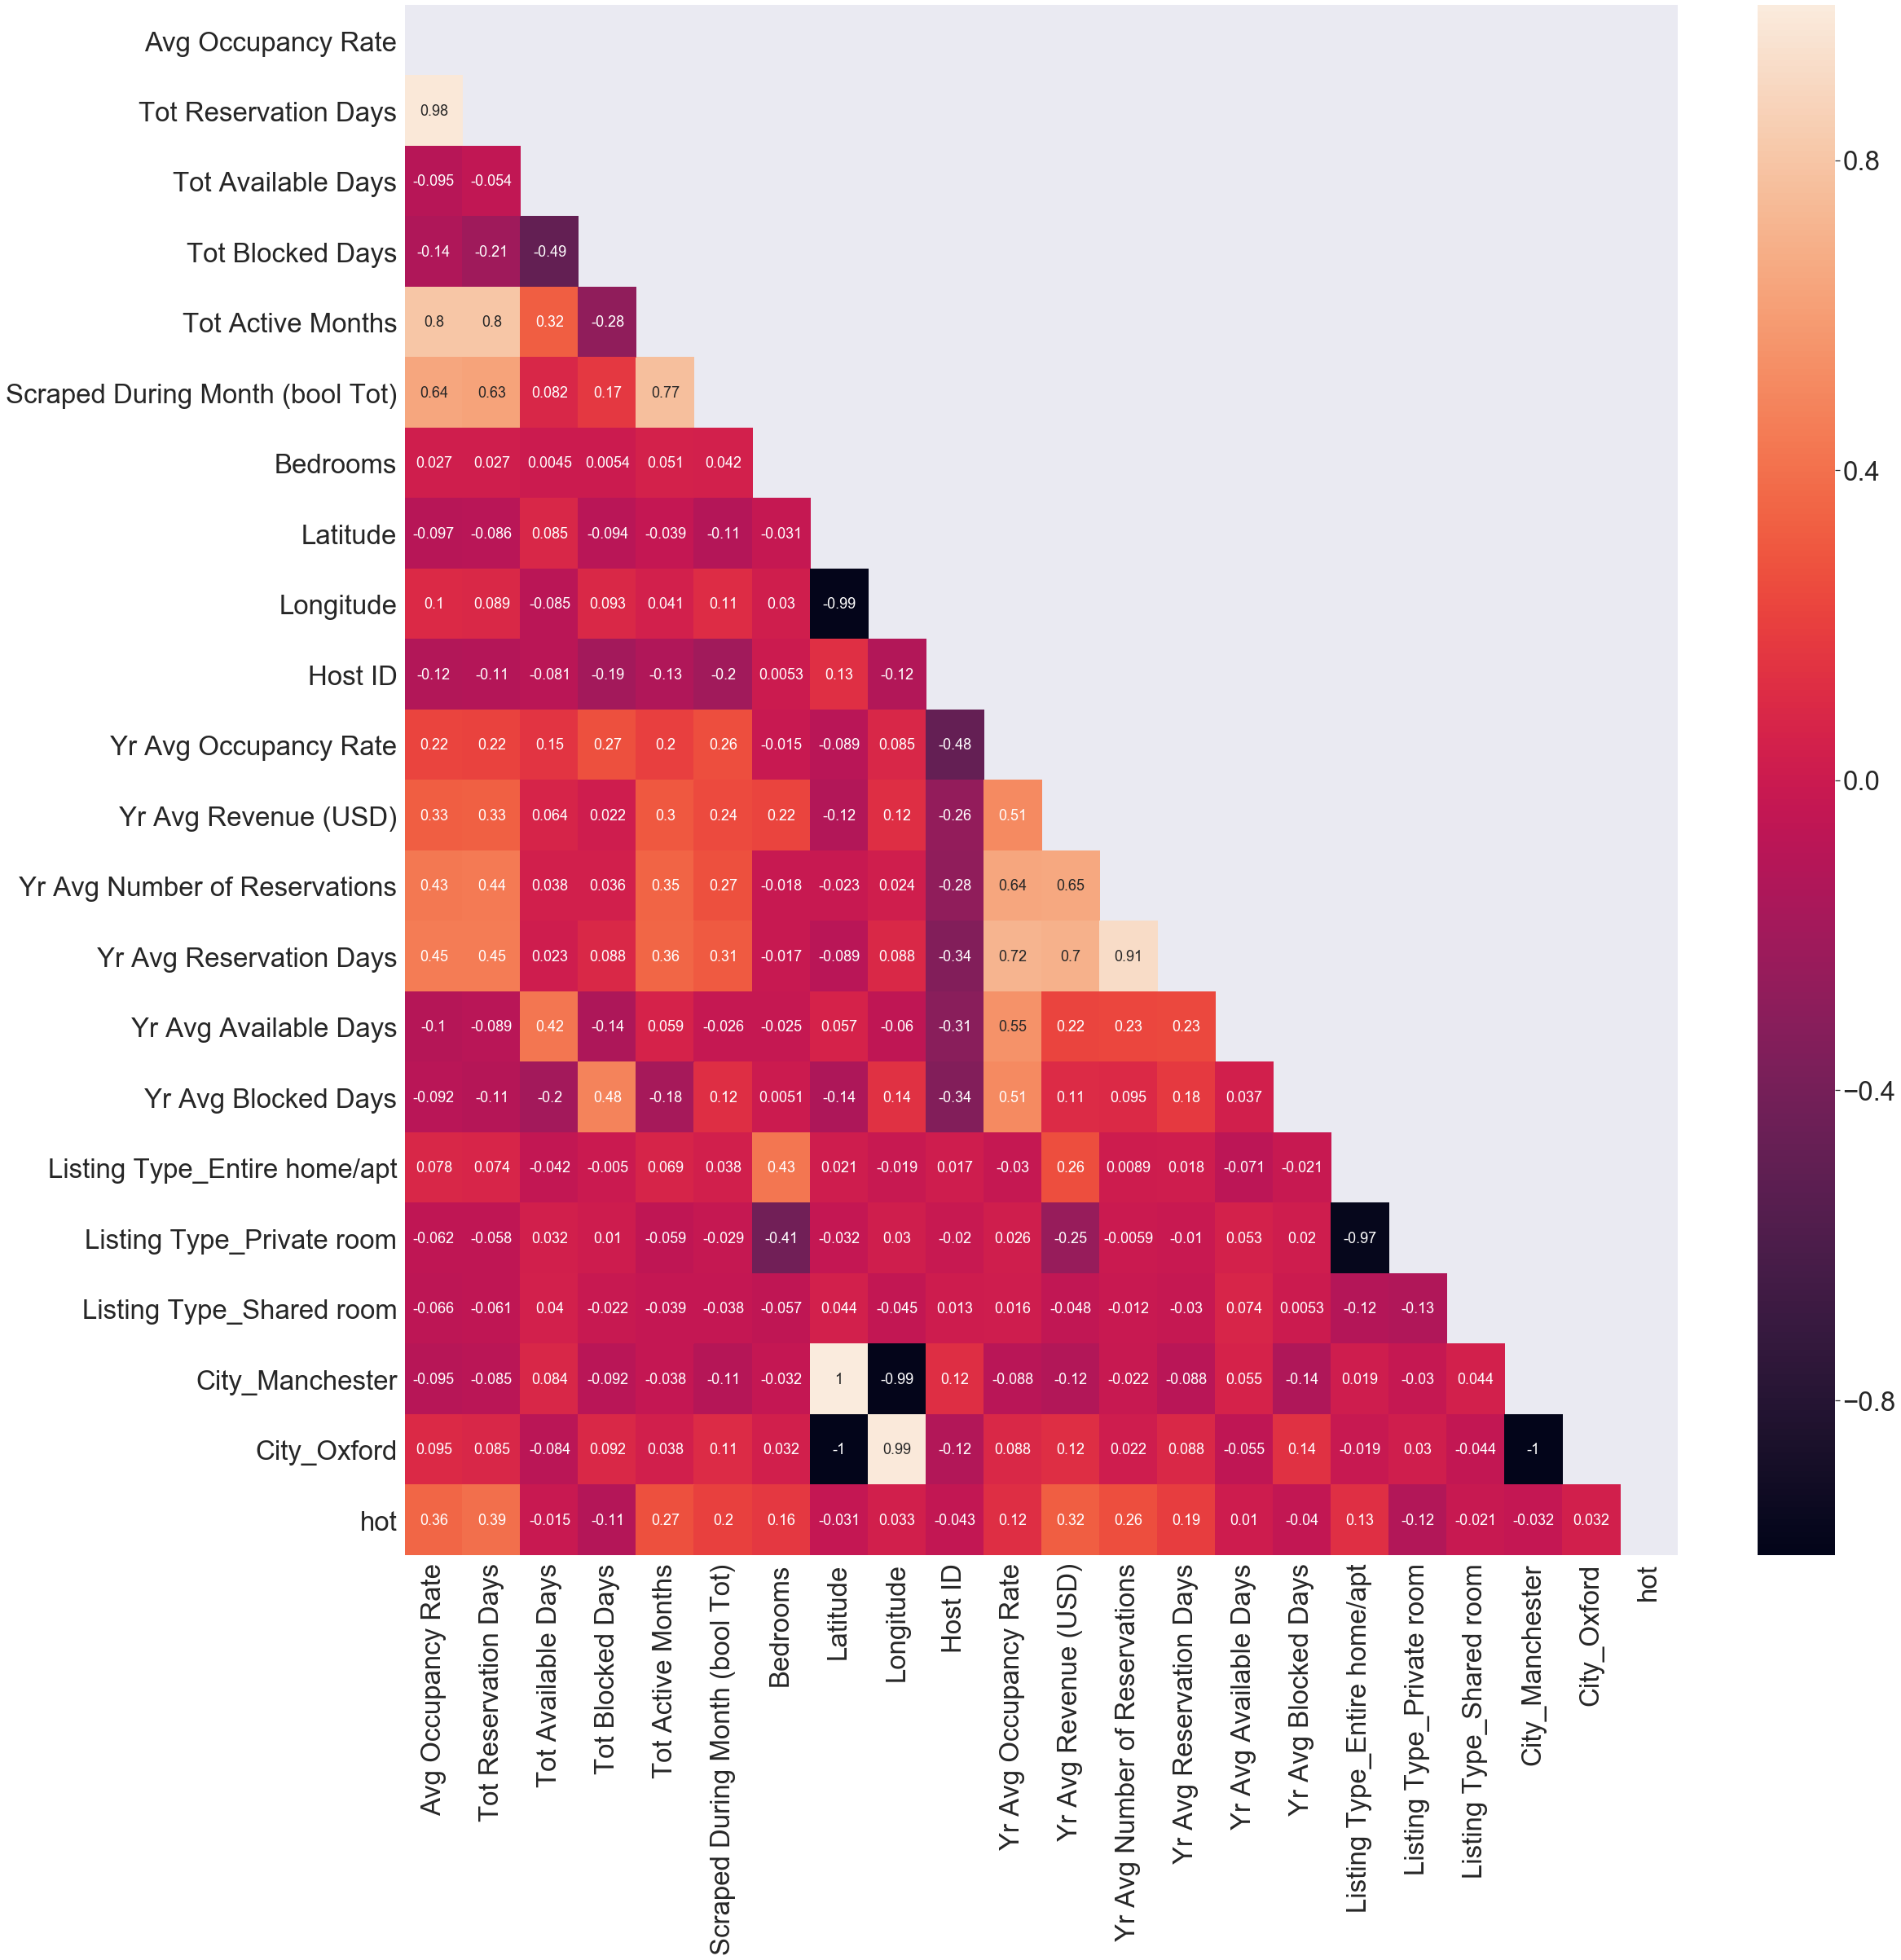

In [69]:
airbnb_pearson_corr_full = airbnb_18_encoded_df.corr()
mask = np.triu(np.ones_like(airbnb_pearson_corr_full, dtype=bool))

sns.set(font_scale=3)

fig = plt.figure(figsize =(35,35))
sns.heatmap(airbnb_pearson_corr_full, mask=mask, annot=True, annot_kws={"size": 18})
plt.show()

In [70]:
# Pearson's correlation coefficient for the target
airbnb_pearson_corr_full.loc['hot', :]

Avg Occupancy Rate                 0.355455
Tot Reservation Days               0.394013
Tot Available Days                -0.014834
Tot Blocked Days                  -0.112725
Tot Active Months                  0.266702
Scraped During Month (bool Tot)    0.203734
Bedrooms                           0.164556
Latitude                          -0.031397
Longitude                          0.033128
Host ID                           -0.042961
Yr Avg Occupancy Rate              0.119588
Yr Avg Revenue (USD)               0.322861
Yr Avg Number of Reservations      0.258461
Yr Avg Reservation Days            0.191553
Yr Avg Available Days              0.010461
Yr Avg Blocked Days               -0.039656
Listing Type_Entire home/apt       0.128753
Listing Type_Private room         -0.123313
Listing Type_Shared room          -0.020849
City_Manchester                   -0.031646
City_Oxford                        0.031646
hot                                1.000000
Name: hot, dtype: float64

From the analysis, we can see the numerical features `[Avg Occupancy Rate, Tot Reservation Days, Yr Avg Revenue (USD), Yr Avg Number of Reservations]` have very strong correlations with the target label `hot`, with the corresponding Pearson correlation coefficients $|r|>0.25$, whereas `[Tot Active Months, Scraped During Month (bool Tot), Bedrooms, Yr Avg Reservation Days]` have intermediate correlations with Pearson correlation coefficients $|r|\sim 0.15$. Note that, however, some of these features are strongly correlated between themselves and we should only keep one of them in such correlated pairs for analysis.

# Feature selection:  features which are strongly correlated with each other

In this section, we inspect how the feature variables are correlated among themselves using the above heatmap. In particular, we would like to identify collinear features, i.e. features that are highly correlated with one another. In machine learning, these lead to decreased generalization performance on the test set due to high variance and less model interpretability. We should only keep one feature within each collinear features pairs for ML analysis.

In [71]:
# collinear features to drop
col_to_drop = ['Tot Reservation Days', 'Longitude', 'Yr Avg Reservation Days', 'Yr Avg Blocked Days', 
               'Listing Type_Private room', 'City_Manchester', 'City_Oxford']

airbnb_ML_df = airbnb_18_encoded_df.drop(columns=col_to_drop)

$\color{blue}{\text{Feature engineering}}$: create additional derived features which might be useful for predictions. For instance, we construct a new feature called `Yr Avg Revenue per Bedrooms` defined as `Yr Avg Revenue (USD)` per `Number of Bedrooms` here.

In [72]:
# Yr Avg Revenue per number of bedrooms
airbnb_ML_df['Yr Avg Revenue per Bedrooms'] = airbnb_ML_df.apply(lambda x: x['Yr Avg Revenue (USD)']/x['Bedrooms'] 
                                                                 if x['Bedrooms']!=0 else 0, axis=1)

In [73]:
airbnb_ML_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11265 entries, 38085.0 to 31210006.0
Data columns (total 16 columns):
Avg Occupancy Rate                 11265 non-null float64
Tot Available Days                 11265 non-null int64
Tot Blocked Days                   11265 non-null int64
Tot Active Months                  11265 non-null float64
Scraped During Month (bool Tot)    11265 non-null float64
Bedrooms                           11265 non-null int64
Latitude                           11265 non-null float64
Host ID                            11265 non-null float64
Yr Avg Occupancy Rate              11265 non-null float64
Yr Avg Revenue (USD)               11265 non-null float64
Yr Avg Number of Reservations      11265 non-null float64
Yr Avg Available Days              11265 non-null float64
Listing Type_Entire home/apt       11265 non-null uint8
Listing Type_Shared room           11265 non-null uint8
hot                                11265 non-null bool
Yr Avg Revenue per Be

# The ML model

Now we apply various ML classification algorithms to predict whether an airbnb property is 'hot' or not (based on our definition). We will use `Decision Tree, Gaussian Navies Bayes, Random Forest` classifiers here.

In [74]:
def standard_scale(df, num_col):
    """
    Function that standardises and scales the numerical features into similar 
    range for ML algorithms (except tree-based models).
    
    Parameters
    ----------
    df : DataFrame
        An input pandas dataframe containing the features.

    num_col : list
        The list of numerical features (nominal) to be standardised.

    Returns
    ---------
    scaler : sklearn obj
        The StandardScaler fitted to the input df.
    
    df : DataFrame
        The transformed features dataframe.

    """
    scaler = StandardScaler()
    df[num_col] = scaler.fit_transform(df[num_col])
    return scaler, df

As an investment company, over-estimating an airbnb property's profitability costs much severe damages than the under-estimating case, since the former would correspond to bad investments and losing money, whereas the latter would normally just correspond to missing opportunities. 
$\color{blue}{\text{Therefore, we would use `precision score` as the model evaluation metric in this classification problem.}}$

In [75]:
from sklearn.metrics import precision_score

def metric_score_per_ML_clf(X, y, num_col, clf, cv):
    """
    Function that returns the detailed metric score information for each ML classifier inputed.

    Parameters
    ----------    
    X : Dataframe
        DataFrame containing the feature variables.
        
    y : arr-like or pd.Series
        The target variable
        
    num_col : list of str
        numerical columns to be standardised
        
    clf : arr-like
        List of Machine Learning classification models to run
        
    cv_split : sklearn.model_selection._split
        How to split the dataset to perform cross validation

    Returns
    -------
    metric_score_df : DataFrame
        Dataframe containing the detailed metric score information for each 
        ML classifier.

    """
    MLA_columns = ['ML_classifier_name', 'ML_parameters','train_score_mean', 'test_score_mean', 
                   'test_score_3*std', 'test_score_min']
    metric_score_df = pd.DataFrame(columns = MLA_columns)

    #index through MLA and save performance to table
    row_index = 0
    
    for alg in clf:
    
        # set name and parameters
        MLA_name = alg.__class__.__name__
        metric_score_df.loc[row_index, 'ML_classifier_name'] = MLA_name
        metric_score_df.loc[row_index, 'ML_parameters'] = str(alg.get_params())
        
        cv_scores_train = []
        cv_scores_test = []

        for train_index, test_index in cv.split(X, y):
            X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                        y.iloc[train_index], y.iloc[test_index]
    
            # perform scaling based on training data
            scaler, X_processed_train = standard_scale(X_train, num_col)
        
            # use the fitted scaler and PCA to transform test data
            X_processed_test = X_test.copy()
            X_processed_test[num_col] = scaler.transform(X_test[num_col])
    
            # fit the preprocessed training data to the ML classifier
            alg.fit(X_processed_train, y_train)
    
            # store results into lists
            y_train_predict = alg.predict(X_processed_train)
            y_test_predict = alg.predict(X_processed_test)
            cv_scores_train.append(precision_score(y_train, y_train_predict))
            cv_scores_test.append(precision_score(y_test, y_test_predict))

        metric_score_df.loc[row_index, 'train_score_mean'] = np.mean(cv_scores_train)
        metric_score_df.loc[row_index, 'test_score_mean'] = np.mean(cv_scores_test)   
        metric_score_df.loc[row_index, 'test_score_min'] = min(cv_scores_test)
        
        # Compute the spread of the test_precision_score
        metric_score_df.loc[row_index, 'test_score_3*std'] = np.std(cv_scores_test)*3  
    
        row_index+=1
    
    # print and sort table
    metric_score_df.sort_values(by = ['test_score_mean'], ascending = False, inplace = True)
    return metric_score_df

In [76]:
# identifying the feature and target columns
feature_col = airbnb_ML_df.drop(columns=['hot']).columns
target_var = 'hot'

In [77]:
from sklearn import tree, naive_bayes, ensemble

# List of Machine Learning classification models considered (with default hyperparameters)
MLA_classifier = [   
    tree.DecisionTreeClassifier(),
    naive_bayes.GaussianNB(),
    ensemble.RandomForestClassifier(),
    ]

# numerical col to be standardised
numerical_col = ['Avg Occupancy Rate', 'Tot Available Days', 'Tot Blocked Days',
                 'Tot Active Months', 'Scraped During Month (bool Tot)', 'Bedrooms', 'Latitude',
                 'Host ID', 'Yr Avg Occupancy Rate', 'Yr Avg Revenue (USD)',
                 'Yr Avg Number of Reservations', 'Yr Avg Available Days', 'Yr Avg Revenue per Bedrooms']

X = airbnb_ML_df[feature_col]
y = airbnb_ML_df[target_var]

In [78]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
metric_score_per_ML_clf(X, y, numerical_col, MLA_classifier, cv)

,ML_classifier_name,ML_parameters,train_score_mean,test_score_mean,test_score_3*std,test_score_min
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",1,0.785973,0.322519,0.555556
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",1,0.525235,0.25631,0.392857
1,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.152602,0.152795,0.0413445,0.134615


From the above, we can see Random Forest classifier gives the best performance among the three models. However there is significant overfitting. As a result, we shall try remove some of the unpredictive features and tune some of the hyperparameters in the following to see if the overfitting issue can be resolved.

$\color{blue}{\text{Feature Importance}}$: Study the feature importance 

Next we study the feature importance. We are interested in determining the most relevant features for predicting whether a property is 'hot' or not here. We shall retain only those features deemed as important in our final model. 

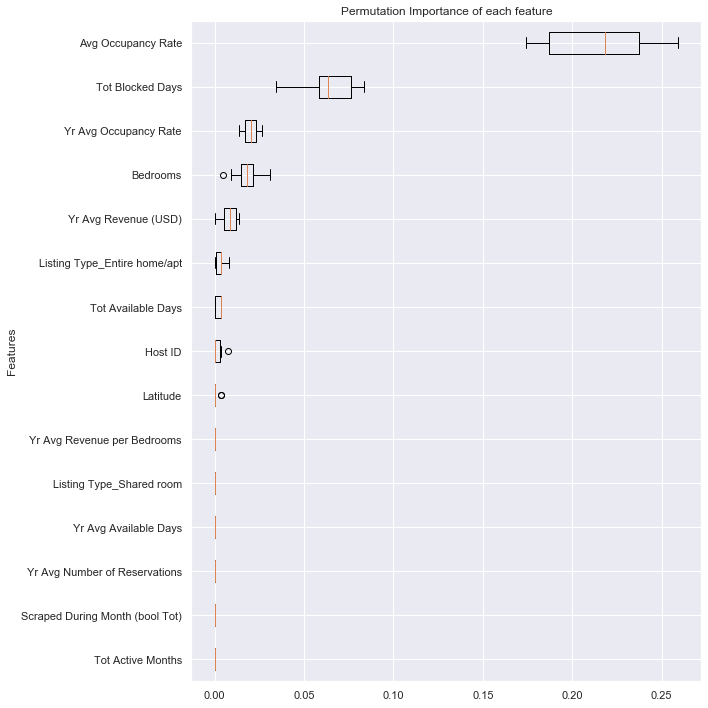

In [79]:
from sklearn.inspection import permutation_importance

clf = ensemble.RandomForestClassifier().fit(X, y)
result = permutation_importance(clf, X, y, scoring='precision', n_repeats=10, random_state=42, n_jobs=-1)

%matplotlib inline
sns.set()

fig, ax = plt.subplots(figsize =(10,10))
sorted_idx = result.importances_mean.argsort()
ax.boxplot(result.importances[sorted_idx].T, vert=False, labels=range(X.shape[1]))
ax.set_title("Permutation Importance of each feature")
plt.yticks(np.arange(1,16), X.columns[sorted_idx])
ax.set_ylabel("Features")
fig.tight_layout()
plt.show()

From the above plot, we can see `Average Occupancy Rate` is the most important. Together with `[Bedrooms, Tot Blocked Days, Yr Avg Occupancy Rate, Listing Type_Entire home/apt, Yr Avg Revenue (USD)]`, they have a relatively noticable impact on the model predictions (with the difference between the baseline metric and metric from permutating the feature column > 0). We shall keep only these features, train and evaluate our models again in the following.

In [80]:
# feature columns to be selected
sel_col = ['Avg Occupancy Rate', 'Bedrooms', 'Tot Blocked Days', 'Yr Avg Occupancy Rate', 
           'Listing Type_Entire home/apt']

# numerical col to be standardised
num_col =  ['Avg Occupancy Rate', 'Bedrooms', 'Tot Blocked Days', 'Yr Avg Occupancy Rate']

MLA_classifier = [   
    tree.DecisionTreeClassifier(max_depth=2),
    naive_bayes.GaussianNB(),
    ensemble.RandomForestClassifier(max_depth=3, n_estimators=30),
    ]

X_red = airbnb_ML_df[sel_col]
y_red = airbnb_ML_df[target_var]

cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
metric_score_per_ML_clf(X_red, y_red, num_col, MLA_classifier, cv)

,ML_classifier_name,ML_parameters,train_score_mean,test_score_mean,test_score_3*std,test_score_min
2,RandomForestClassifier,"{'bootstrap': True, 'ccp_alpha': 0.0, 'class_w...",0.980253,0.9,0.9,0
1,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.40855,0.400619,0.14485,0.344262
0,DecisionTreeClassifier,"{'ccp_alpha': 0.0, 'class_weight': None, 'crit...",0.28575,0.29304,0.896898,0


$\color{blue}{\text{Hyperparameter tuning}}$:

We can see the Random Forest and Decision Tree classifiers still overfit even with some features removed. We will try use `RandomizedSearchCV` to tune the hyperparameters to see if we can resolve the issue. 

In [81]:
from sklearn.model_selection import cross_validate, RandomizedSearchCV

# base random forest model
clf = ensemble.RandomForestClassifier(max_depth=5)
base_results = cross_validate(clf, X_red, y_red, scoring='precision', cv = 10, return_train_score=True)
clf.fit(X_red, y_red)

print('BEFORE tuning, hyperparameters: ', clf.get_params())
print('\n')
print("BEFORE tuning, precision train mean score: {:.2f}".format(base_results['train_score'].mean())) 
print("BEFORE tuning, precision test mean score: {:.2f}".format(base_results['test_score'].mean()))
print("BEFORE tuning, precision score 2*std: +/- {:.2f}".format(base_results['test_score'].std()*2))
print('-'*10)

# tune hyper-parameters:
n_estimators = [10, 20, 30, 40, 50, 100, 200]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 4, 5, 8]
max_depth.append(None)
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# choose best model with grid_search: 
tune_model = RandomizedSearchCV(ensemble.RandomForestClassifier(), param_distributions=random_grid, 
                                scoring = 'precision', cv = 10, return_train_score=True)
tune_model.fit(X_red, y_red)

print('AFTER tuning, best hyperparameters: ', tune_model.best_params_)
print('\n')
print("AFTER tuning, Training score mean: {:.2f}".format(tune_model.cv_results_['mean_train_score'][tune_model.best_index_])) 
print("AFTER tuninng, test score mean: {:.2f}".format(tune_model.cv_results_['mean_test_score'][tune_model.best_index_]))
print("AFTER tuning, Test f1 score 2*std: +/- {:.2f}".format(tune_model.cv_results_['std_test_score'][tune_model.best_index_]*2))
print('-'*10)

BEFORE tuning, hyperparameters:  {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


BEFORE tuning, precision train mean score: 0.94
BEFORE tuning, precision test mean score: 0.80
BEFORE tuning, precision score 2*std: +/- 0.40
----------
AFTER tuning, best hyperparameters:  {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 4, 'bootstrap': False}


AFTER tuning, Training score mean: 0.95
AFTER tuninng, test score mean: 0.86
AFTER tuning, Test f1 score 2*std: +/- 0.30
----------


$\color{blue}{\text{Conclusion: Naive Bayes model is better}}$

The `Random Forest` model still overfits and we conclude it is not a good ML model. We shall therefore use the `Gaussian Naive Bayes` model as our final model instead. The `Naive Bayes` model gives a precision score of around $0.4$ with the reduced number of features.

# Model evaluation

To evaluate our ML model performance, we would need to compare the model with some other benchmark models. The simple obvious benchmark models for comparison here are:

$\color{blue}{\text{1) random guessing, 3% hot}}$

In [82]:
import random
from sklearn.metrics import roc_auc_score, accuracy_score

airbnb_baseline_df = airbnb_ML_df.copy()

# 1) random guessing model

for index, row in airbnb_baseline_df.iterrows(): 
    if random.random() > .97:        
        airbnb_baseline_df.set_value(index, 'random_pred', int(1)) # predict hot
    else: 
        airbnb_baseline_df.set_value(index, 'random_pred', int(0)) # predict not hot
    

# Compute the corresponding scores
print('Random guessing, precision score: {:.2f}'.format(precision_score(airbnb_baseline_df['hot'], 
                                                                 airbnb_baseline_df['random_pred'])))
print('Random guessing, roc_auc score: {:.2f}'.format(roc_auc_score(airbnb_baseline_df['hot'], 
                                                                    airbnb_baseline_df['random_pred'])))
print('Random guessing, accuracy score: {:.2f}'.format(accuracy_score(airbnb_baseline_df['hot'], 
                                                                      airbnb_baseline_df['random_pred'])))

Random guessing, precision score: 0.02
Random guessing, roc_auc score: 0.49
Random guessing, accuracy score: 0.94


$\color{blue}{\text{2) random guessing, 50% hot}}$

In [83]:
import random
from sklearn.metrics import roc_auc_score, accuracy_score

airbnb_baseline_df = airbnb_ML_df.copy()

# 1) random guessing model

for index, row in airbnb_baseline_df.iterrows(): 
    if random.random() > .5:        
        airbnb_baseline_df.set_value(index, 'random_pred', int(1)) # predict hot
    else: 
        airbnb_baseline_df.set_value(index, 'random_pred', int(0)) # predict not hot
    

# Compute the corresponding scores
print('Random guessing, precision score: {:.2f}'.format(precision_score(airbnb_baseline_df['hot'], 
                                                                 airbnb_baseline_df['random_pred'])))
print('Random guessing, roc_auc score: {:.2f}'.format(roc_auc_score(airbnb_baseline_df['hot'], 
                                                                    airbnb_baseline_df['random_pred'])))
print('Random guessing, accuracy score: {:.2f}'.format(accuracy_score(airbnb_baseline_df['hot'], 
                                                                      airbnb_baseline_df['random_pred'])))

Random guessing, precision score: 0.03
Random guessing, roc_auc score: 0.53
Random guessing, accuracy score: 0.50


Unsurprisingly, random guessing poorly predicts whether an airbnb property is 'hot' or not, with a very low precision score ~O(0.01). Now let's study our final Naive Bayes model perform on predicting whether a property is 'hot' or not in greater details, for instance inspecting the resulting confusion matrix.

In [84]:
airbnb_ML_final_df = airbnb_ML_df.copy()

from sklearn.model_selection import train_test_split

# Our final ML model, using Gaussian Naive Bayes
X_train, X_test, y_train, y_test = train_test_split(X_red, y_red, train_size=.9, random_state=42)
GNB_final = naive_bayes.GaussianNB()
GNB_final.fit(X_train, y_train)

y_train_pred = GNB_final.predict(X_train)
y_test_pred = GNB_final.predict(X_test)
print('Gaussian Naive Bayes, train precision score: {:.2f}'.format(precision_score(y_train, y_train_pred)))
print('Gaussian Naive Bayes, test precision score: {:.2f}'.format(precision_score(y_test, y_test_pred)))
print('Gaussian Naive Bayes, test roc_auc score: {:.2f}'.format(roc_auc_score(y_test, y_test_pred)))
print('Gaussian Naive Bayes, test accuracy score: {:.2f}'.format(accuracy_score(y_test, y_test_pred)))

Gaussian Naive Bayes, train precision score: 0.40
Gaussian Naive Bayes, test precision score: 0.47
Gaussian Naive Bayes, test roc_auc score: 0.79
Gaussian Naive Bayes, test accuracy score: 0.96


In [85]:
import itertools

def plot_confusion_matrix(c_matrix, classes, normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix. Normalization can be 
    applied by setting 'normalize=True'.
    
    Parameters
    ----------    
    c_matrix : 2x2 numpy array
        confusion matrix (binary)
        
    classes : list of str
        list of class labels
        
    normalize : boolean
        Normalise the confusion matrix or not. Default = False
        
    """
    if normalize:
       c_matrix = c_matrix .astype('float') / c_matrix.sum(axis=1)[:, np.newaxis]

    plt.imshow(c_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = c_matrix.max() / 2.
    for i, j in itertools.product(range(c_matrix.shape[0]), range(c_matrix.shape[1])):
        plt.text(j, i, format(c_matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if c_matrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [86]:
airbnb_ML_final_df['GNB_pred'] = GNB_final.predict(X_red)

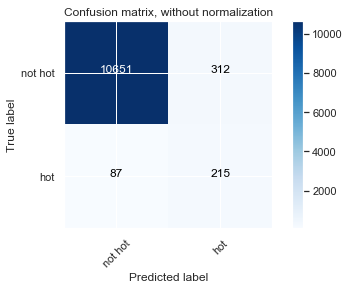

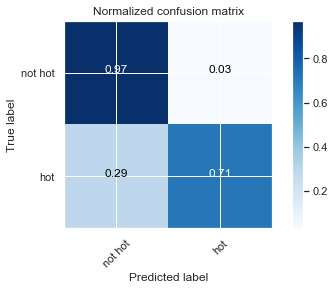

In [87]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix, Gaussian Naive Bayes
cnf_matrix = confusion_matrix(airbnb_ML_final_df['hot'], airbnb_ML_final_df['GNB_pred'])
np.set_printoptions(precision=2)

class_names = ['not hot', 'hot']

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True, 
                      title='Normalized confusion matrix')

# Conclusion

From the above, we can see our final Naive Bayes model correctly classifies around 71% of the 'hot' properties as 'hot' (i.e. ~71% true positive, ~29% false positive) and around 97% of the 'non-hot' properties (i.e. ~97% true negative, ~3% false negative). The resulting precision score is around 0.4.

In [88]:
airbnb_agg_final_df['hot'] = airbnb_ML_df['hot']
airbnb_agg_final_df['GNB_pred'] = airbnb_ML_final_df['GNB_pred']

In [89]:
airbnb_agg_final_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 11265 entries, 38085.0 to 31210006.0
Data columns (total 22 columns):
Avg Occupancy Rate                 11265 non-null float64
Tot Revenue (USD)                  11265 non-null float64
Tot Number of Reservations         11265 non-null int64
Tot Reservation Days               11265 non-null int64
Tot Available Days                 11265 non-null int64
Tot Blocked Days                   11265 non-null int64
Tot Active Months                  11265 non-null float64
Scraped During Month (bool Tot)    11265 non-null float64
Listing Type                       11265 non-null object
Bedrooms                           11265 non-null int64
City                               11265 non-null object
Latitude                           11265 non-null float64
Longitude                          11265 non-null float64
Host ID                            11265 non-null float64
Yr Avg Occupancy Rate              6982 non-null float64
Yr Avg Revenue (USD) 

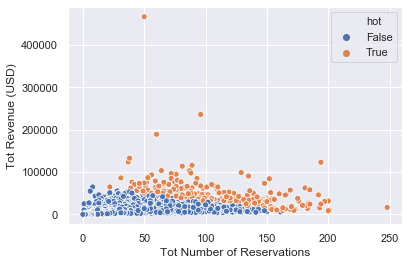

In [92]:
sns.scatterplot(x='Tot Number of Reservations', y='Tot Revenue (USD)', hue='hot', data=airbnb_agg_final_df)

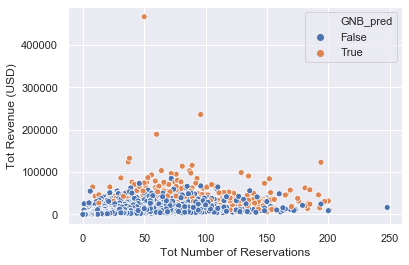

In [93]:
sns.scatterplot(x='Tot Number of Reservations', y='Tot Revenue (USD)', hue='GNB_pred', data=airbnb_agg_final_df)